In [1]:
!pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 14.9 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=b914a257606da19bf8519525f6c76da5084f900c09d94aae38c036c88c783730
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
Successfully built pyLDAvis


In [2]:
!pip install pytrends 
!pip install psutil requests
import pandas as pd
import pytrends
from pytrends.request import TrendReq
import pandas as pd
import re
from datetime import datetime
import time
from scipy.stats import spearmanr
import plotly.express as px
from scipy import stats
import nltk
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from plotly import tools as tls
import plotly.graph_objs as go
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import matplotlib.pyplot as plt
from nltk import tokenize
import matplotlib as plt
from matplotlib import *
import sys
from pylab import *
import seaborn as sns
from wordcloud import WordCloud
import gensim
from gensim.utils import simple_preprocess
from gensim import models
nltk.download('stopwords')
from nltk.corpus import stopwords
import gensim.corpora as corpora
from pprint import pprint
from gensim.models.coherencemodel import CoherenceModel
from google.colab import drive
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for pytrends: filename=pytrends-4.8.0-py3-none-any.whl size=16126 sha256=f167090a616bfb980e9bd8c408a2061b043d57cf3cb8f1f86beb8c1422d3c440
  Stored in directory: /root/.cache/pip/wheels/07/6f/5c/8174f98dec1bfbc7d5da4092854afcbcff4b26c3d9b66b5183
Successfully built pytrends
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning:

Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working

/usr/local/lib/python3.7/dist-packages/past/builtins/misc.py:4: DeprecationWarning:

Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working

/usr/local/lib/python3.7/dist-packages/scipy/sparse/sparsetools.py:21: DeprecationWarning:

`scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df_mev = pd.read_csv('/content/drive/Shareddrives/SciEcon Ethereum + & SRS/Yifu_Zesen_Research/Replicated data/mevdata (1).csv').drop(["Unnamed: 0"], axis =1)
df_mev

Date  \
0    2021-12-31 05:49:28+00:00   
1    2021-12-28 17:14:22+00:00   
2    2021-12-27 11:00:25+00:00   
3    2021-12-27 10:00:34+00:00   
4    2021-12-27 02:32:05+00:00   
..                         ...   
426  2021-03-23 21:43:11+00:00   
427  2021-03-23 01:49:32+00:00   
428  2021-03-17 19:40:17+00:00   
429  2021-03-17 15:37:19+00:00   
430  2021-03-16 22:39:10+00:00   

                                                Tweets  
0    This is what a sandwich attack looks like. The...  
1    ¿Sabías que en el mundo de las #DeFi existen e...  
2    [#IOTAQuicktakes] Let’s wrap up this year with...  
3    [#IOTAQuicktakes] Let’s wrap up this year with...  
4    What is Miner extractable value (#MEV) and how...  
..                                                 ...  
426  #MEV has a reputational problem, and is usuall...  
427  $OHM just got listed on Sushiswap, a bot "brib...  
428  Today's livestream I covered a range of topics...  
429  📢 New Mevion Blog Post! 📝 \n\nCheck out our br...  
430  🏹 ARB THAT ARCH! 🏹\n\nOcarinaBot completed the...  

[431 rows x 2 columns]

In [5]:
df_flashbots = pd.read_csv('/content/drive/Shareddrives/SciEcon Ethereum + & SRS/Yifu_Zesen_Research/Replicated data/flashbots (1).csv').drop(["Unnamed: 0"], axis =1)
df_flashbots

Date  \
0    2021-12-31 10:36:24+00:00   
1    2021-12-27 18:37:50+00:00   
2    2021-12-26 06:41:29+00:00   
3    2021-12-18 16:36:53+00:00   
4    2021-12-13 15:11:25+00:00   
..                         ...   
218  2021-03-19 23:48:43+00:00   
219  2021-03-19 17:31:54+00:00   
220  2021-03-19 17:26:18+00:00   
221  2021-03-18 18:30:14+00:00   
222  2021-03-17 19:57:33+00:00   

                                                Tweets  
0    Support new artist, help us grow!! Shill the S...  
1    Support new artist, help us grow!! Shill the S...  
2    Support new artist, help us grow!! Shill the S...  
3    Support new artist, help us grow!! Shill the S...  
4    Tech blog article by @arpaofficial cryptograph...  
..                                                 ...  
218  #Flashbots is your "Portal" in the Dark Forest...  
219  Checkout my insights on the growth and utility...  
220  🚀 @OurNetwork__ #63 just dropped\n\n📈 -- get t...  
221  Announcing this week's @OurNetwork__ lineup 🚀\...  
222  Thrilled to announce #FlashBots will be covere...  

[223 rows x 2 columns]

## Data cleaning

1) Remove punctuation 

2) Convert the titles to lowercase 

In [6]:
def clean_data(df):
  df['paper_text_processed'] = \
  df['Tweets'].map(lambda x: re.sub('[,\.!?]', '', str(x)))
  df['paper_text_processed'] = \
  df['paper_text_processed'].map(lambda x: x.lower())
  return df

<input>:2: DeprecationWarning:

invalid escape sequence \.

<input>:2: DeprecationWarning:

invalid escape sequence \.

<input>:2: DeprecationWarning:

invalid escape sequence \.

<ipython-input-6-7d9652e4ffc4>:2: DeprecationWarning:

invalid escape sequence \.



In [7]:
df_mev2=clean_data(df_mev)
df_flashbots=clean_data(df_flashbots)

## Time series

###Average Tweet Length & Volume


1) Calculate Tweet Volume by date

2) Calculate Average Tweet Length by Date

In [22]:
def ts_tweet(df):
  df['len'] = df['paper_text_processed'].str.split().str.len()
  df["Date"]=pd.to_datetime(df["Date"],errors='coerce',utc=True)
  df["day"]=df["Date"].dt.date
  c=pd.DataFrame({'Tweet Counts' : df.groupby(by=["day"])["Tweets"].count()}).reset_index()
  tweet_volume=c["Tweet Counts"].values.tolist()
  a=pd.DataFrame({'Tweet Length' : df.groupby(by=["day"])["len"].mean()}).reset_index()
  tweet_len=a["Tweet Length"].values.tolist()
  return tweet_len, tweet_volume, df

For mev

In [9]:
tweet_len_mev2, tweet_volume_mev2, df_mev2 = ts_tweet(df_mev2)[0], ts_tweet(df_mev2)[1], ts_tweet(df_mev2)[2]
del tweet_len_mev2[0:2]
del tweet_volume_mev2[0:2]

For flashbots

In [10]:
tweet_len_flashbots, tweet_volume_flashbots, df_flashbots = ts_tweet(df_flashbots)[0], ts_tweet(df_flashbots)[1], ts_tweet(df_flashbots)[2]
del tweet_len_flashbots[0:2]
del tweet_volume_flashbots[0:2]

In [ ]:
tweet_volume_flashbots

In [ ]:
tweet_len_flashbots

##Google Trend

In [11]:
def google_trend(keywords, date_interval):
  pytrend = TrendReq(tz=0)
  KEYWORDS=[keywords] 
  KEYWORDS_CODES=[pytrend.suggestions(keyword=i)[0] for i in KEYWORDS] 
  df_CODES= pd.DataFrame(KEYWORDS_CODES)
  EXACT_KEYWORDS=df_CODES['mid'].to_list()
  DATE_INTERVAL=date_interval
  COUNTRY=["US"] #Use this link for iso country code
  CATEGORY=0 # Use this link to select categories
  SEARCH_TYPE='' #default is 'web searches',others include 'images','news','youtube','froogle' (google shopping)
  Individual_EXACT_KEYWORD = list(zip(*[iter(EXACT_KEYWORDS)]*1))
  Individual_EXACT_KEYWORD = [list(x) for x in Individual_EXACT_KEYWORD]
  dicti = {}
  i = 1
  for Country in COUNTRY:
    for keyword in Individual_EXACT_KEYWORD:
      pytrend.build_payload(kw_list=keyword, 
                              timeframe = DATE_INTERVAL, 
                              geo = Country, 
                              cat=CATEGORY,
                              gprop=SEARCH_TYPE) 
      dicti[i] = pytrend.interest_over_time()
      i+=1
  df_trends = pd.concat(dicti, axis=1)
  df_trends.columns = df_trends.columns.droplevel(0) #drop outside header
  df_trends = df_trends.drop('isPartial', axis = 1) #drop "isPartial"
  df_trends.reset_index(level=0,inplace=True) #reset_index
  df_trends.columns=['date','google trend'] #change column names
  return df_trends

For mev

In [12]:
df_trend_mev2=google_trend("mev",'2020-05-24 2020-12-2')
df_trend_mev2["tweet_volume"]=tweet_volume_mev2
df_trend_mev2["tweet_len"]=tweet_len_mev2

In [31]:
df_trend_mev2

date  google trend  tweet_volume  tweet_len
0   2020-05-24            83             2       30.0
1   2020-05-25            75             1       26.0
2   2020-05-26            63             3       32.0
3   2020-05-27            70             1       46.0
4   2020-05-28            53             1       22.0
..         ...           ...           ...        ...
188 2020-11-28            44             1       35.0
189 2020-11-29            71             1       29.0
190 2020-11-30            63             4       41.5
191 2020-12-01            55             1       38.0
192 2020-12-02            47             1       51.0

[193 rows x 4 columns]

For flashbots

In [42]:
df_trend_flashbots=google_trend("flashbot",'2021-05-24 2021-10-3')
df_trend_flashbots["tweet_volume"]=tweet_volume_flashbots
df_trend_flashbots["tweet_len"]=tweet_len_flashbots

In [43]:
df_trend_flashbots

date  google trend  tweet_volume  tweet_len
0   2021-05-24            86             3  20.666667
1   2021-05-25             0             2  37.500000
2   2021-05-26             0             1  42.000000
3   2021-05-27             0             1  19.000000
4   2021-05-28             0             1  49.000000
..         ...           ...           ...        ...
128 2021-09-29             0             1  36.000000
129 2021-09-30             0             1  15.000000
130 2021-10-01             0             1  15.000000
131 2021-10-02           100             1  15.000000
132 2021-10-03             0             1  15.000000

[133 rows x 4 columns]

In [15]:
df_trend_concat= pd.concat ([df_trend_mev2, df_trend_flashbots])
df_trend_concat=df_trend_concat.append({'date': datetime.datetime(2021, 1, 1), 'google trend': 0, 'tweet_volume': 0,'tweet_len': 0}, ignore_index=True)
df_trend_concat=df_trend_concat.append({'date': datetime.datetime(2021, 3, 14), 'google trend': 0, 'tweet_volume': 0,'tweet_len': 0}, ignore_index=True)
df_trend_concat=df_trend_concat.sort_values(by=['date'], ascending=True).reset_index().drop(["index"], axis = 1)
df_trend_concat

date  google trend  tweet_volume  tweet_len
0   2020-05-24            83             2       30.0
1   2020-05-25            75             1       26.0
2   2020-05-26            63             3       32.0
3   2020-05-27            70             1       46.0
4   2020-05-28            53             1       22.0
..         ...           ...           ...        ...
323 2021-09-29             0             1       36.0
324 2021-09-30             0             1       15.0
325 2021-10-01             0             1       15.0
326 2021-10-02           100             1       15.0
327 2021-10-03             0             1       15.0

[328 rows x 4 columns]

##Spearman Correlation test

In [38]:
def spearman_corr(df_trends,names):
  coef, p = spearmanr(df_trends["tweet_volume"], df_trends["google trend"])
  print(names)
  print('Spearmans correlation coefficient: %.3f' % coef)
  print('P-value: %.3f' % p)

For mev tag

In [25]:
spearman_corr(df_trend_mev2,"mev")

mev
Spearmans correlation coefficient: 0.101
P-value: 0.161


For tag flahsbots

In [36]:
spearman_corr(df_trend_flashbots,"flashbot")

flashbot
Spearmans correlation coefficient: 0.080
P-value: 0.360


##Plot Average Tweet Length

In [44]:
trace1 = go.Scatter(x=df_trend_mev2["date"], y=df_trend_mev2["tweet_len"], name=" #mev")
trace2 = go.Scatter(x=df_trend_flashbots["date"], y=df_trend_flashbots["tweet_len"], name=" #flashbots")
trace3 = go.Scatter(x=df_trend_mev2["date"], y=[25.3]*len(df_trend_mev2["date"]), name="Mean",line=dict(color='blue', width=4,
                    dash='dash'))
trace4 = go.Scatter(x=df_trend_flashbots["date"], y=[25.0]*len(df_trend_flashbots["date"]), name="Mean",line=dict(color='firebrick', width=4,
                    dash='dash'))

fig = make_subplots(rows=2, cols=1,
                        print_grid=True,
                        horizontal_spacing=0.5,
                        vertical_spacing=0.3, subplot_titles=("for #mev2","for #flashbots")
                         )

fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 2, 1)
fig.append_trace(trace3, 1, 1)
fig.append_trace(trace4, 2, 1)

#fig.update_layout(trace1 = dict(range=[<from_value>, <to_value>]))
# Set x-axis title
fig.update_xaxes(title_text="Date",tickfont_size=13,)
fig.update_layout(xaxis1 = dict(range=["2020-05-24","2021-10-3"]))

# Set y-axes titles
fig.update_yaxes(title_text="No. of Words per Tweet", tickfont_size=13, secondary_y=False,range=[15,35])

This is the format of your plot grid:
[ (1,1) x,y   ]
[ (2,1) x2,y2 ]



/usr/local/lib/python3.7/dist-packages/plotly/basedatatypes.py:2312: DeprecationWarning:

The append_trace method is deprecated and will be removed in a future version.
Please use the add_trace method with the row and col parameters.


/usr/local/lib/python3.7/dist-packages/plotly/basedatatypes.py:2312: DeprecationWarning:

The append_trace method is deprecated and will be removed in a future version.
Please use the add_trace method with the row and col parameters.


/usr/local/lib/python3.7/dist-packages/plotly/basedatatypes.py:2312: DeprecationWarning:

The append_trace method is deprecated and will be removed in a future version.
Please use the add_trace method with the row and col parameters.


/usr/local/lib/python3.7/dist-packages/plotly/basedatatypes.py:2312: DeprecationWarning:

The append_trace method is deprecated and will be removed in a future version.
Please use the add_trace method with the row and col parameters.




##Plot Google Trend & Tweet Volume

In [45]:
def figure_volume(df_trends, names):
  fig = make_subplots(rows=2, cols=1) 
  fig = make_subplots( specs=[[{"secondary_y": True}]])
  fig.add_trace(
      go.Scatter(x=df_trends["date"], y=df_trends["tweet_volume"], name="Tweet Volume"),
      secondary_y=False,
  )
  fig.add_trace(
      go.Scatter(x=df_trends["date"], y=df_trends["google trend"], name="Google Trend"),
      secondary_y=True,
  )
  fig.update_layout(
      title_text="Time Series for Google Trend and Tweet Volume for "+names
  )
  fig.update_xaxes(title_text="Date")
  fig.update_yaxes(title_text="<b>Tweet Volume</b> (tweet)", secondary_y=False)
  fig.update_yaxes(title_text="<b>Google Trend</b> (topic popularity)", secondary_y=True)
  fig.show()

In [46]:
figure_volume(df_trend_mev2,"#mev")

In [47]:
figure_volume(df_trend_flashbots,"#flashbot")

In [48]:
def figure_volume_2(df_trends, names):
  fig = make_subplots(rows=2, cols=1) 
  fig = make_subplots( specs=[[{"secondary_y": True}]])
  fig.add_trace(
      go.Scatter(x=df_trends["date"], y=df_trends["tweet_volume"], name="Tweet Volume"),
      secondary_y=False,
  )
  fig.add_trace(
      go.Scatter(x=df_trends["date"], y=df_trends["google trend"], name="Google Trend"),
      secondary_y=True,
  )
  fig.update_layout(
      title_text="Time Series for Google Trend and Tweet Volume for "+names
  )
  fig.update_xaxes(title_text="Date")
  fig.update_yaxes(title_text="<b>Tweet Volume</b> (tweet)", secondary_y=False)
  fig.update_yaxes(title_text="<b>Google Trend</b> (topic popularity)", secondary_y=True)
  fig.add_shape(type="line", x0=datetime.datetime(2021, 1, 1), y0=1, x1=datetime.datetime(2021, 3, 14), y1=1,line=dict(color="White",width=2.5,))
  fig.add_trace(go.Scatter(x=[datetime.datetime(2020, 10, 1),datetime.datetime(2020, 12, 1) ], y=[100000, 100000],name = "Time Series for BLM",
    text=["Time Series for #mev",],mode="text",))
  fig.add_trace(go.Scatter(x=[datetime.datetime(2021, 8, 1),datetime.datetime(2021, 12, 1) ], y=[100000, 100000],name = "Time Series for SAH",
    text=["Time Series for #flashbot",],mode="text",))
  fig.show()

In [49]:
figure_volume_2(df_trend_concat,"#mev and #flashbot")

##Overall frequency

In [50]:
nltk.download('stopwords')
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu',"u","e","i鈥檓",'use','https',"tco","i'm","-","de","amp","&amp;"])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [51]:
df_mev2['tweet_without_stopwords'] = df_mev2["paper_text_processed"].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split() if word not in (stop_words)]))
df_flashbots['tweet_without_stopwords'] = df_flashbots["paper_text_processed"].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split() if word not in (stop_words)]))

In [52]:
tokenSpace = tokenize.WhitespaceTokenizer()
def counter(text, columnText, quantity):
    allWords = ' '.join([text for text in text[columnText].astype('str')])
    tokenPhrase = tokenSpace.tokenize(allWords)
    frequency = nltk.FreqDist(tokenPhrase) 
    dfFrequency = pd.DataFrame({"Word": list(frequency.keys()), "Frequency": list(frequency.values())}) 
    dfFrequency = dfFrequency.nlargest(columns = "Frequency", n = quantity)
    dfFrequency=dfFrequency.reset_index().reset_index()
    return dfFrequency

In [53]:
df1=counter(df_mev2, 'tweet_without_stopwords', 20)
df2=counter(df_flashbots, 'tweet_without_stopwords', 20)

###Plot the wordcount graph

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 128156 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 128156 missing from current font.



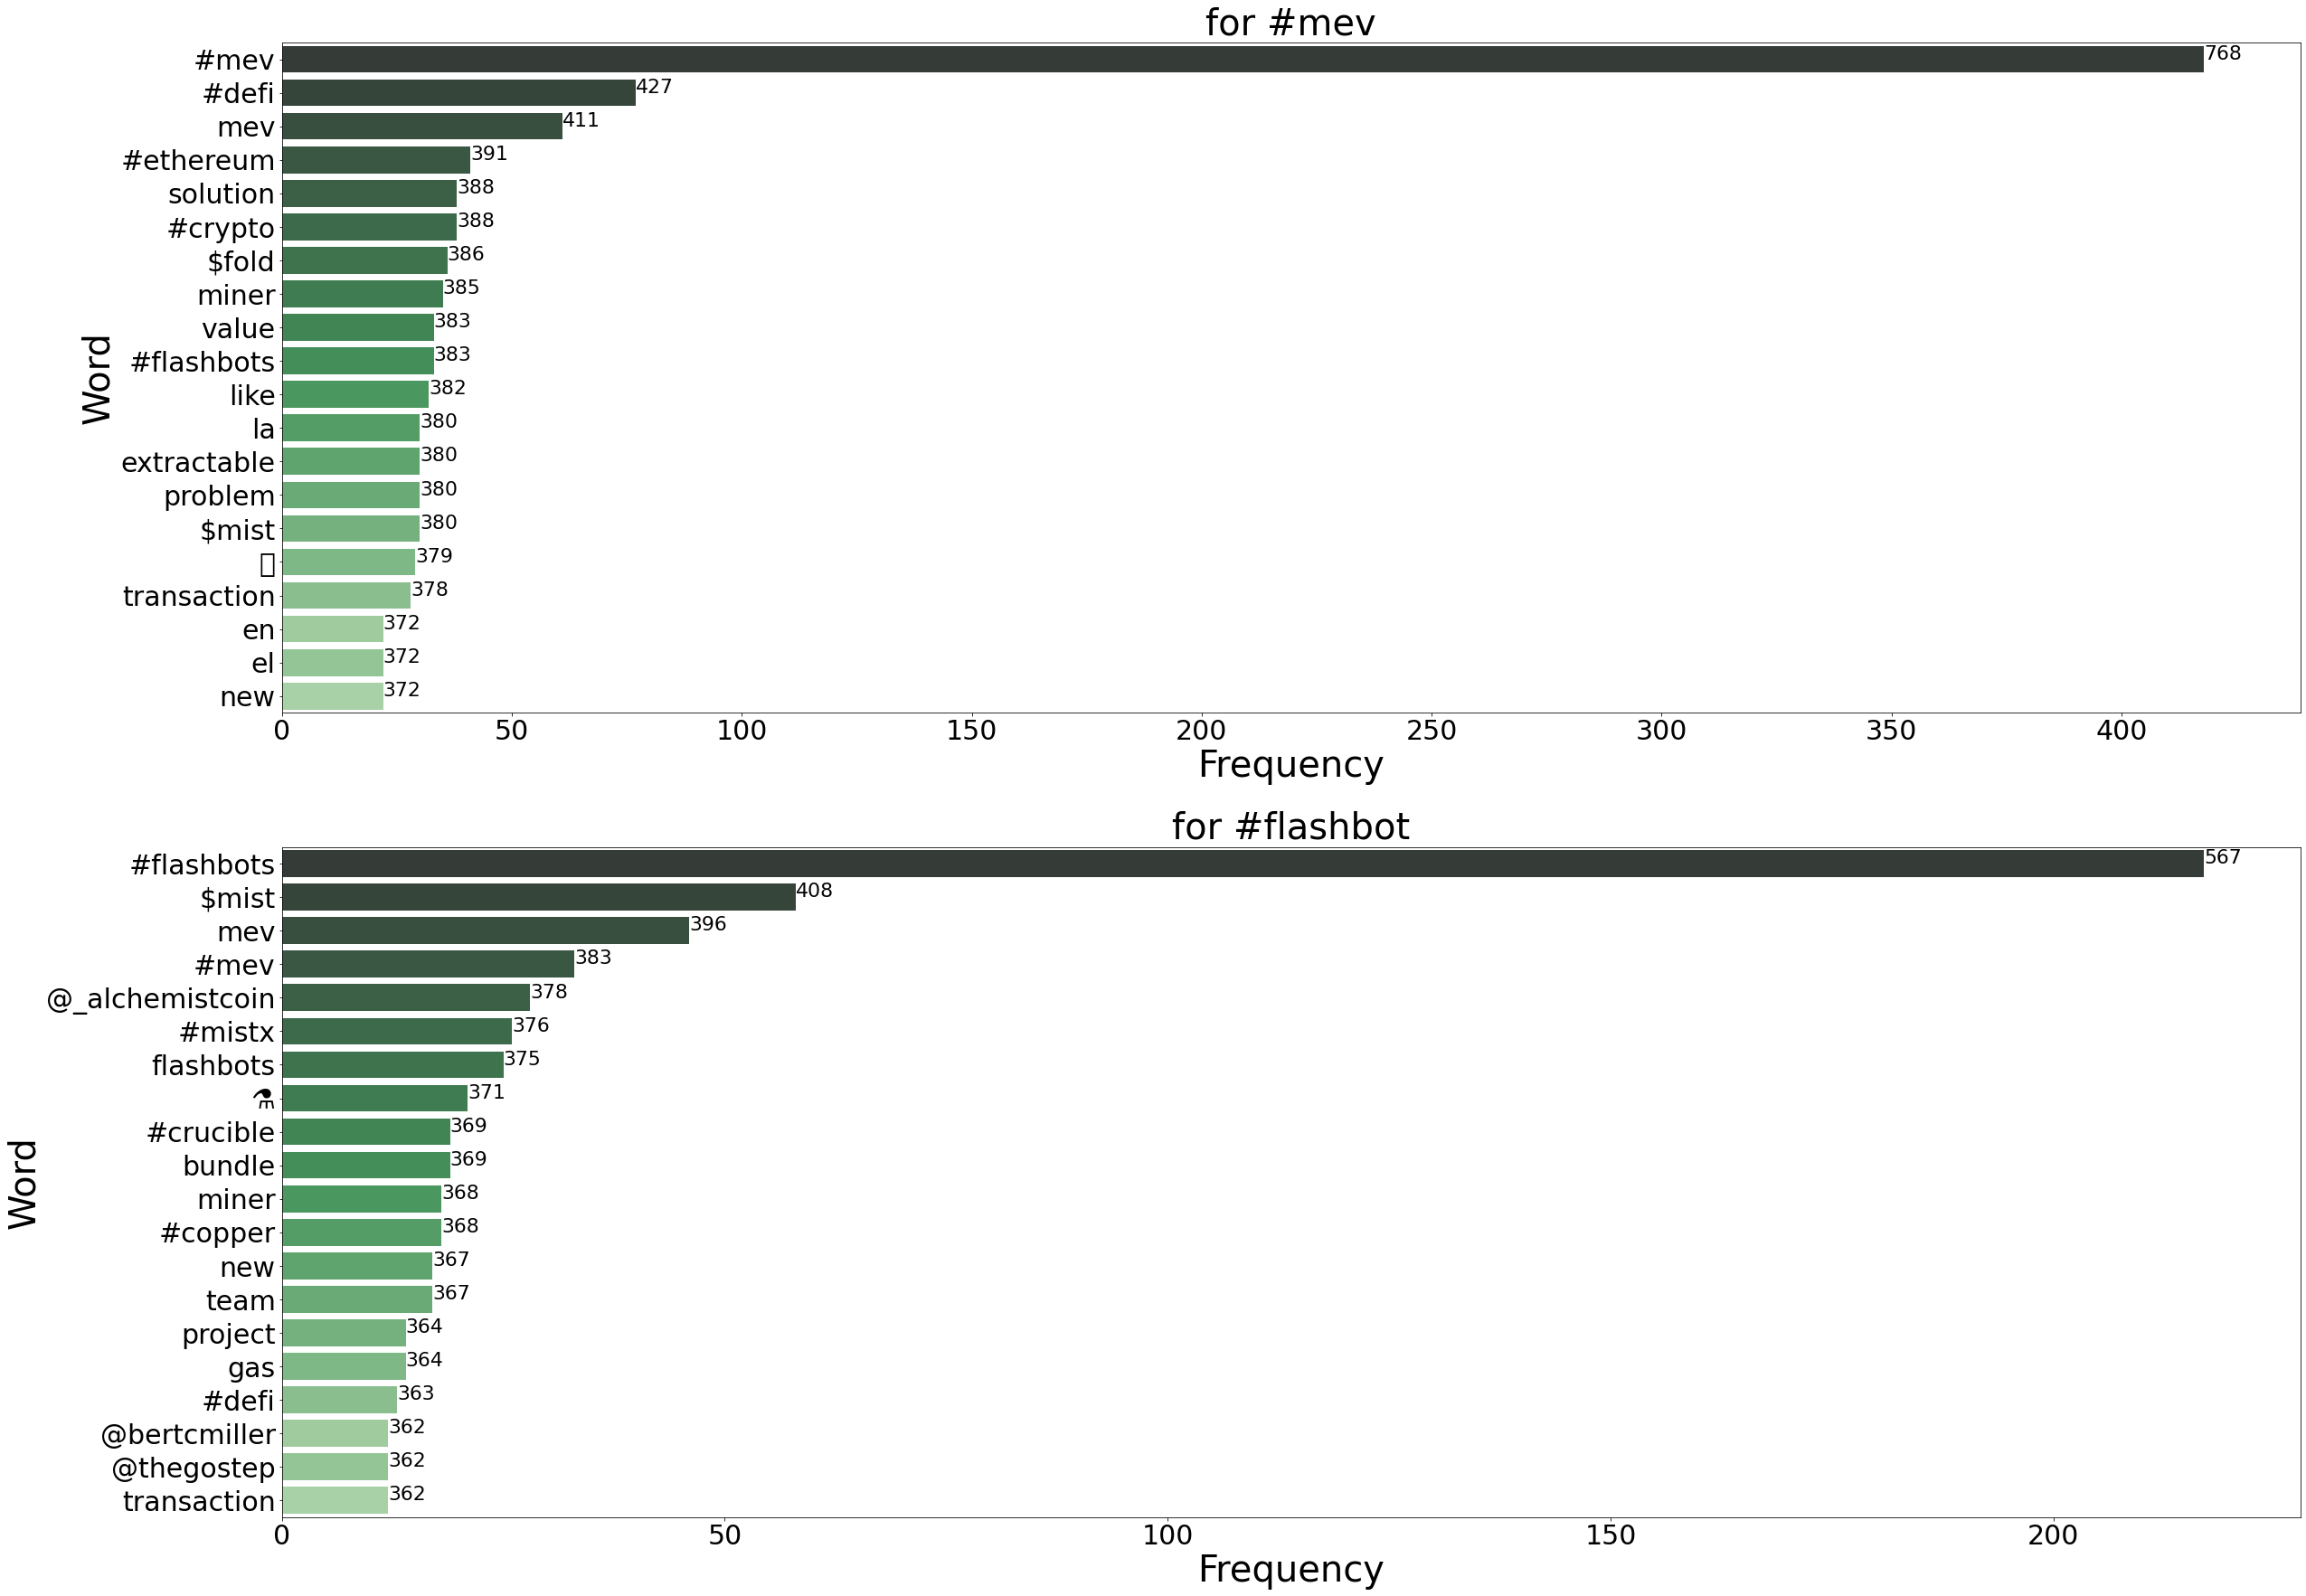

In [54]:
ig, axs = plt.subplots(2,figsize=(40,30))
axs[0].set_title('for #mev',fontsize=40)
axs[1].set_title('for #flashbot',fontsize=40)

pal1 = sns.color_palette("Greens_d", len(df1["Frequency"]))
rank1 = df1["Frequency"].argsort().argsort()
ax1=sns.barplot(data =df1, x = "Frequency", y = "Word", palette=np.array(pal1[::1])[rank1], ax=axs[0])

for index, row in df1.iterrows():
  ax1.text(row.Frequency,row.level_0,int(row.Frequency)+350, color='black', ha="left",fontsize=22)

pal2 = sns.color_palette("Greens_d", len(df2["Frequency"]))
rank2 = df2["Frequency"].argsort().argsort()
ax2=sns.barplot(data =df2, x = "Frequency", y = "Word", palette=np.array(pal2[::1])[rank1], ax=axs[1])

for index, row in df2.iterrows():
  ax2.text(row.Frequency,row.level_0,int(row.Frequency)+350, color='black', ha="left",fontsize=22)

ax1.tick_params(axis='both', which='major', labelsize=30)
ax1.set_xlabel("Frequency",fontsize=40)
ax1.set_ylabel("Word",fontsize=40)
ax2.tick_params(axis='both', which='major', labelsize=30)
ax2.set_xlabel("Frequency",fontsize=40)
ax2.set_ylabel("Word",fontsize=40)

plt.show()


##Word Cloud

In [49]:
# Join the different processed titles together.
long_string = ','.join(list(df_flashbots['paper_text_processed'].values))#.join(list(df['paper_text_processed'].values))

#nltk.download('stopwords')
stop_words = stopwords.words('english')
#stop_words.extend(['from', 'subject', 're', 'edu', 'use','https',"tco","i'm","-","de","amp","&amp;"])

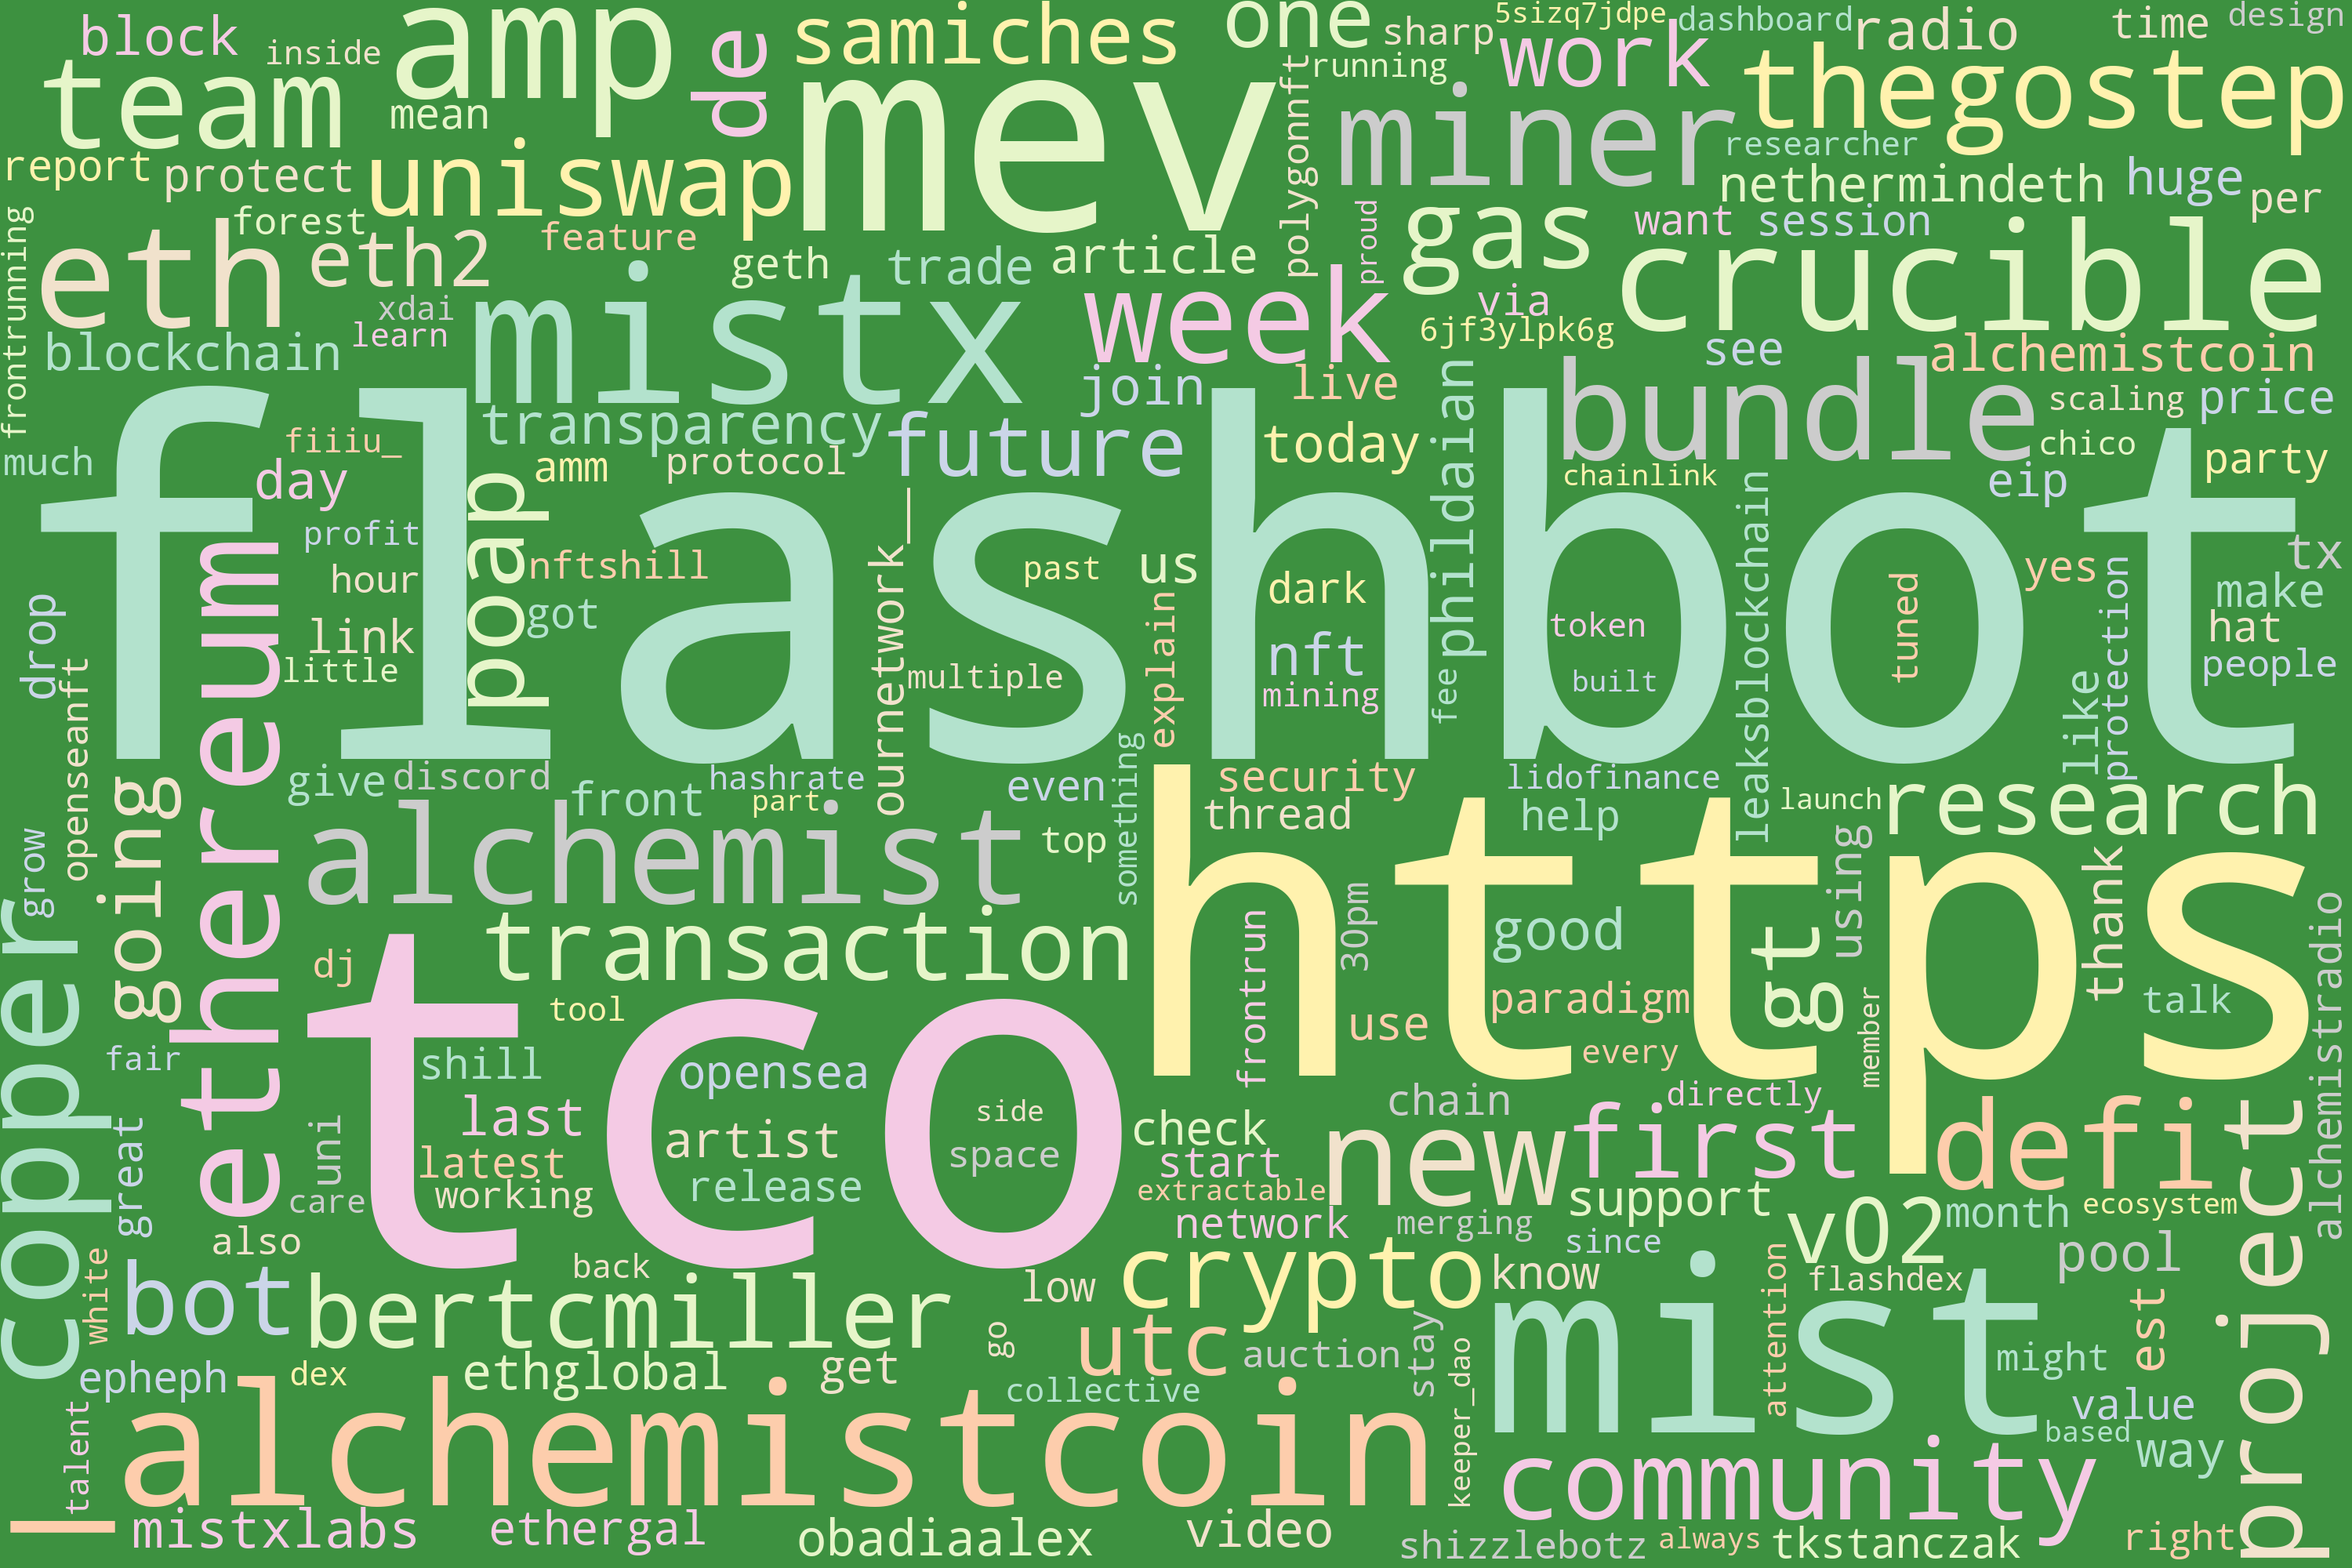

In [50]:
#wordcloud = WordCloud(width= 3000, height = 2000, random_state=1, background_color='#3D9140', colormap='Pastel2', collocations=False).generate(long_string)
wordcloud = WordCloud(width= 3000, height = 2000, random_state=1, background_color='#3D9140', colormap='Pastel2', collocations=False, stopwords =stop_words).generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

In [52]:
long_string = ','.join(list(df_mev2['paper_text_processed'].values))#.join(list(df['paper_text_processed'].values))
nltk.download('stopwords')
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use','https',"tco","i'm","-","de","amp","&amp;"])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


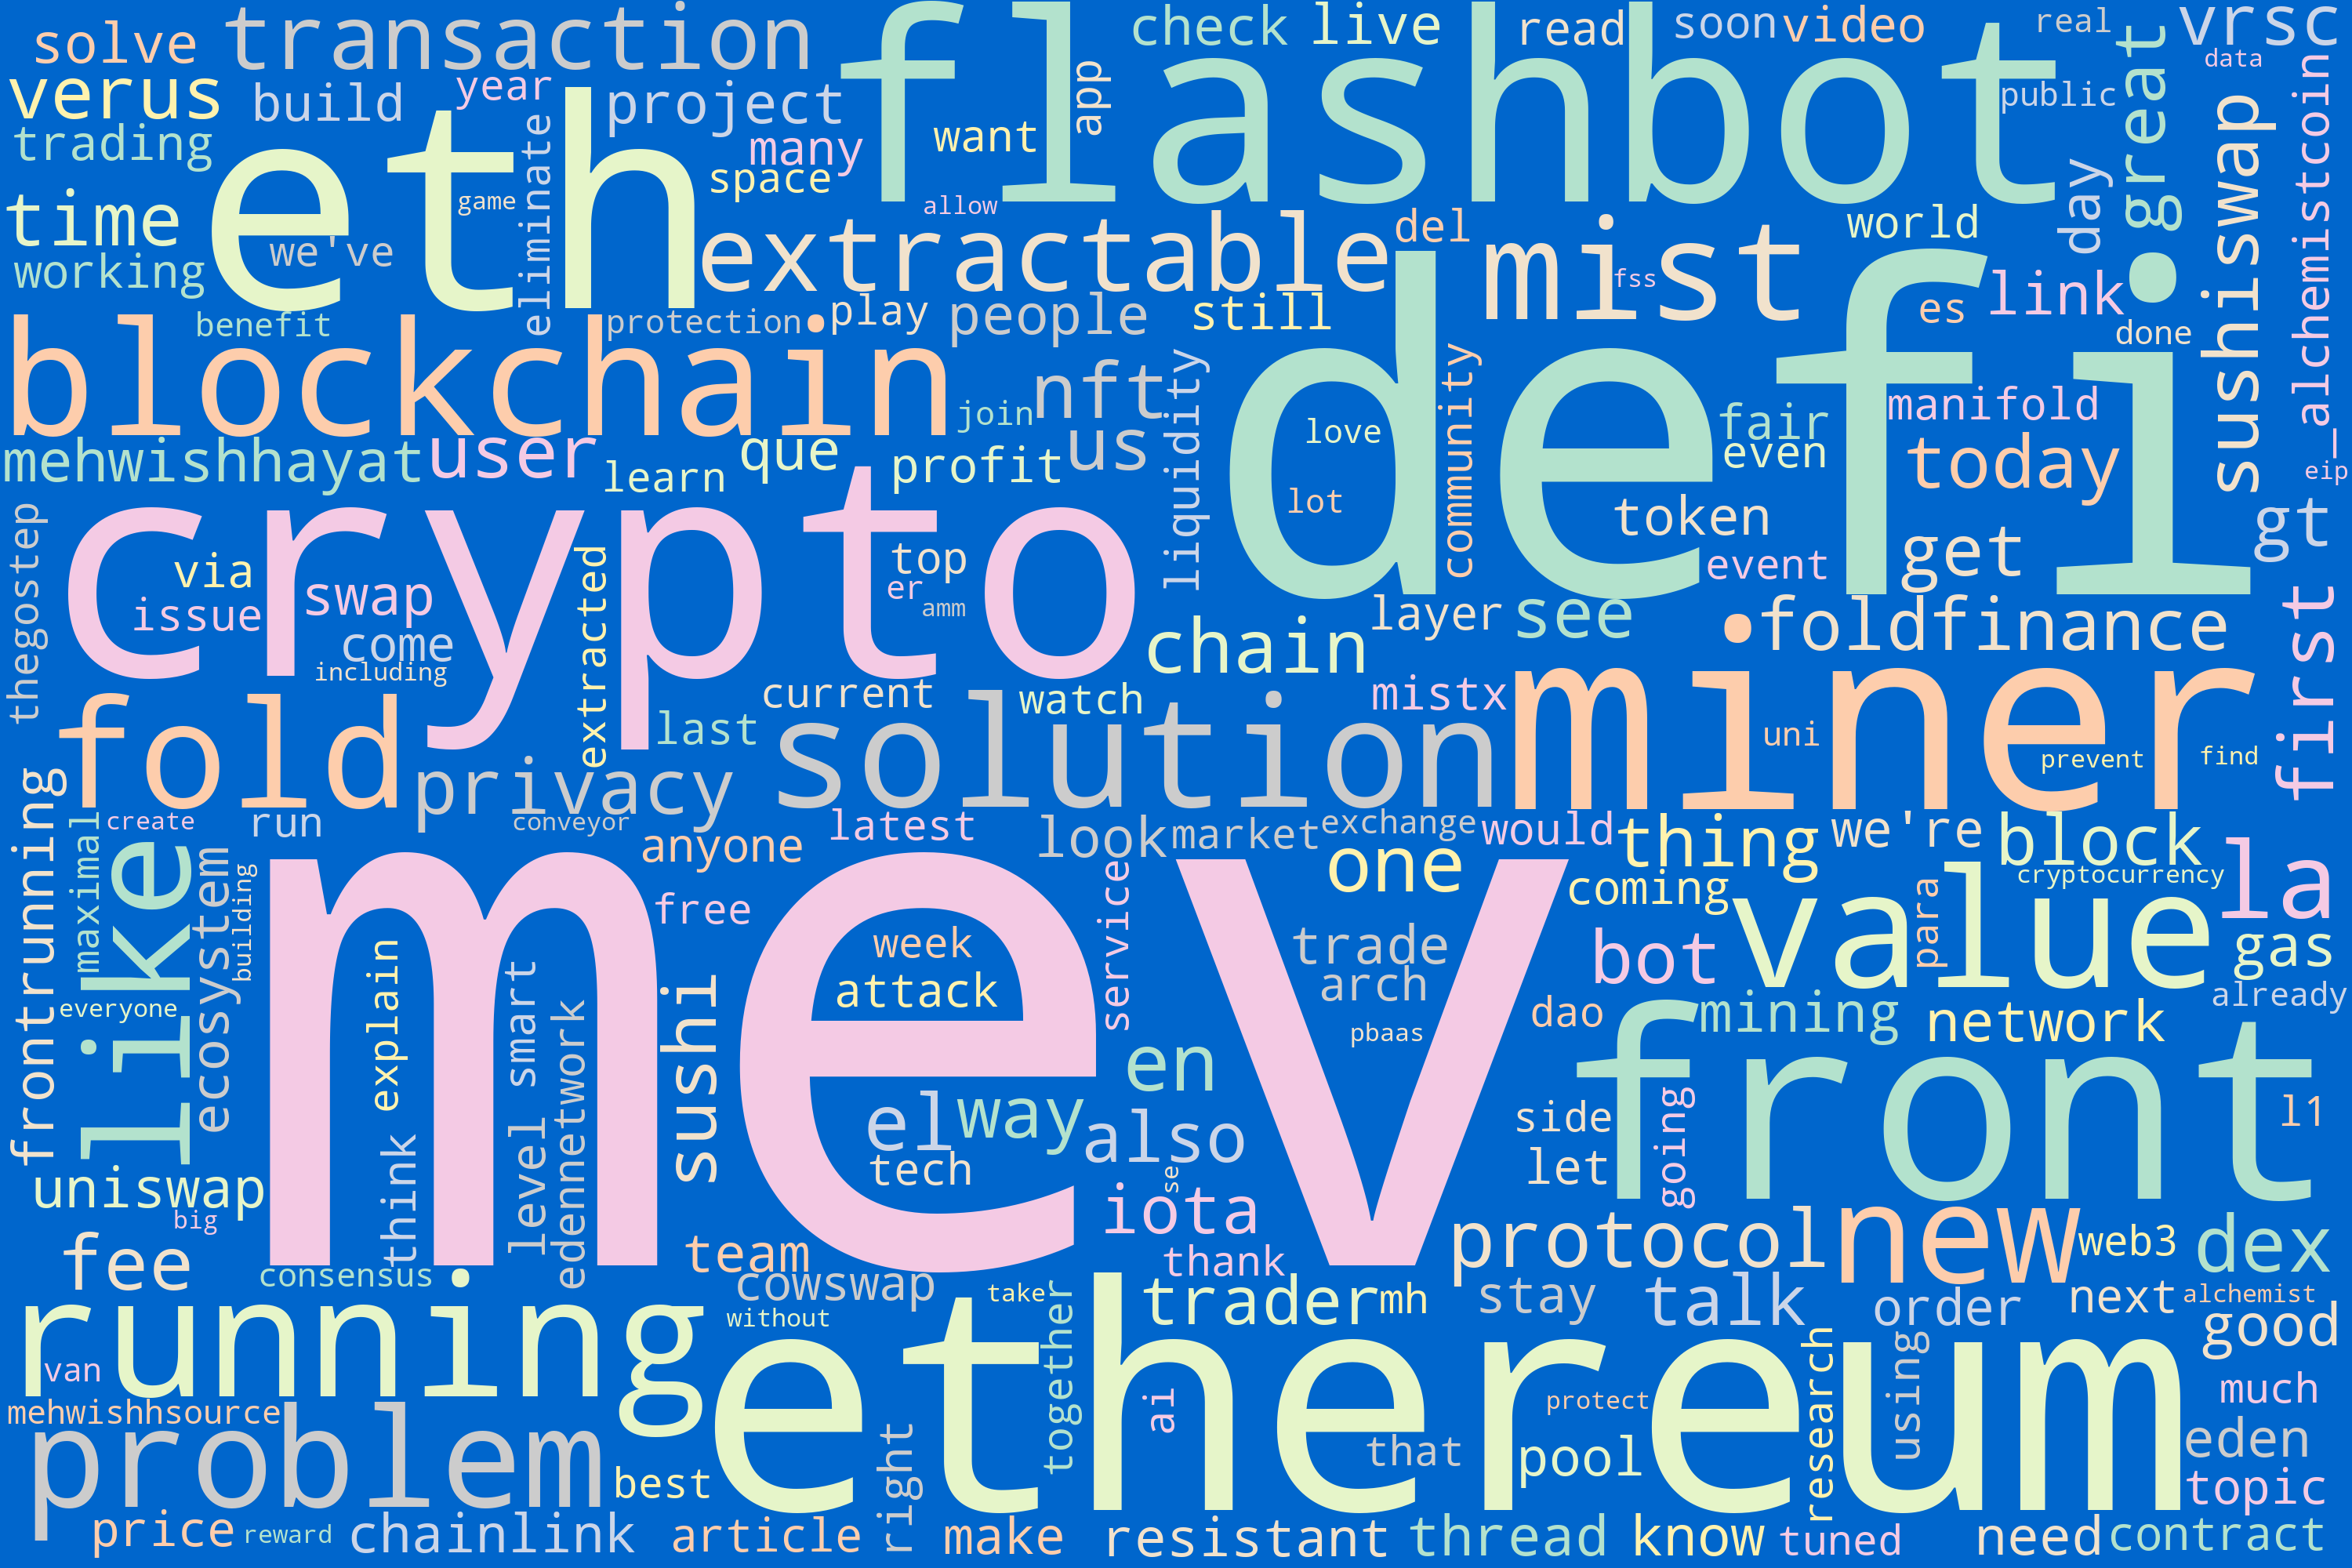

In [54]:
wordcloud = WordCloud(width= 3000, height = 2000, random_state=1, background_color='#0066CC', colormap='Pastel2', collocations=False, stopwords =stop_words).generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

###LDA analysis for tag mev & flashbots

In [55]:
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use','https', "tco","-","de","amp","la","et","les","en","lo","un","el","que","por","es","se","los","para","ser","las","mas","una"])
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]
data = df_flashbots.paper_text_processed.values.tolist()
data_words = list(sent_to_words(data))
# remove stop words
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])

['support', 'new', 'artist', 'help', 'us', 'grow', 'shill', 'shizzlebotz', 'nftshill', 'polygonnft', 'flashbots', 'sizq', 'jdpe', 'opensea', 'openseanft']


In [56]:
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1)]


In [66]:
def lda(corpus,id2word,num_topics):
  lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                        id2word=id2word,
                                        num_topics=num_topics, random_state=100)
  # Print the Keyword 
  pprint(lda_model.print_topics())
  doc_lda = lda_model[corpus]
  
  # Compute Coherence Score
  coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words, dictionary=id2word, coherence='c_v')
  coherence_lda = coherence_model_lda.get_coherence()
  print('\nCoherence Score: ', coherence_lda)

  return doc_lda

Topic is 1

In [58]:
lda(corpus, id2word, 1)

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin in

[(0,
  '0.042*"flashbots" + 0.015*"mev" + 0.011*"mist" + 0.006*"mistx" + '
  '0.005*"eth" + 0.004*"crucible" + 0.004*"ethereum" + 0.003*"copper" + '
  '0.003*"alchemist" + 0.003*"new"')]

Coherence Score:  0.3275670297976407


In [69]:
print(df_mev2['tweet_without_stopwords'])

0      sandwich attack look like they're common low c...
1      ¿sabías que en el mundo la #defi existen estra...
2      [#iotaquicktakes] let’s wrap year recap latest...
3      [#iotaquicktakes] let’s wrap year recap latest...
4      miner extractable value (#mev) people (or flas...
                             ...                        
426    #mev reputational problem usually attached neg...
427    $ohm got listed sushiswap bot "bribed" miner w...
428    today's livestream covered range topic include...
429    📢 new mevion blog post 📝 check brand new blog ...
430    🏹 arb arch 🏹 ocarinabot completed first #mev a...
Name: tweet_without_stopwords, Length: 431, dtype: object


###When is 5

In [87]:
from pprint import pprint

# number of topics
num_topics =5
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics, random_state=0)
# Print the Keyword in the 15 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin in

[(0,
  '0.040*"flashbots" + 0.013*"mev" + 0.006*"new" + 0.006*"mist" + '
  '0.005*"thegostep" + 0.005*"get" + 0.004*"us" + 0.004*"mistxlabs" + '
  '0.004*"support" + 0.004*"artist"'),
 (1,
  '0.039*"flashbots" + 0.016*"mev" + 0.009*"mist" + 0.008*"eth" + '
  '0.007*"mistx" + 0.005*"crucible" + 0.005*"ethereum" + 0.004*"crypto" + '
  '0.004*"work" + 0.003*"new"'),
 (2,
  '0.038*"flashbots" + 0.010*"mist" + 0.007*"eth" + 0.007*"mev" + 0.005*"team" '
  '+ 0.005*"gas" + 0.004*"future" + 0.004*"ethereum" + 0.004*"bertcmiller" + '
  '0.003*"first"'),
 (3,
  '0.045*"flashbots" + 0.024*"mev" + 0.017*"mist" + 0.007*"mistx" + '
  '0.007*"alchemist" + 0.006*"eth" + 0.005*"crucible" + 0.005*"crypto" + '
  '0.004*"gt" + 0.004*"community"'),
 (4,
  '0.045*"flashbots" + 0.011*"mev" + 0.011*"mist" + 0.010*"mistx" + '
  '0.007*"ethereum" + 0.006*"copper" + 0.005*"crucible" + 0.005*"eth" + '
  '0.005*"bundles" + 0.005*"radio"')]


/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin in

In [88]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

import pyLDAvis
# Visualize the topics
pyLDAvis.enable_notebook()
lda_viz = gensimvis.prepare(lda_model, corpus,id2word)
lda_viz

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.051367  0.066191       1        1  26.010968
4     -0.038098 -0.094059       2        1  24.732036
0      0.101595  0.000267       3        1  17.887136
1     -0.020710  0.015274       4        1  16.812807
2      0.008580  0.012326       5        1  14.557052, topic_info=         Term       Freq      Total Category  logprob  loglift
261    crypto   8.000000   8.000000  Default  30.0000  30.0000
119       eth  21.000000  21.000000  Default  29.0000  29.0000
467       get   4.000000   4.000000  Default  28.0000  28.0000
2        grow   3.000000   3.000000  Default  27.0000  27.0000
6    nftshill   3.000000   3.000000  Default  26.0000  26.0000
..        ...        ...        ...      ...      ...      ...
30        mev   3.950526  59.257497   Topic5  -4.9949  -0.7809
5         new   1.856145  12.248620   Topic5  -5.7502   0.0402
237      bots   1.456708   6.411492   Topic5  -5.9925   0.4452
171      defi   1.460835  10.475829   Topic5  -5.9897  -0.0430
234      work   1.382743   7.157198   Topic5  -6.0446   0.2830

[335 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
519       3  0.768488         add
2016      5  0.796422  advantages
1358      4  0.776101         ahu
251       1  0.548616   alchemist
251       2  0.313495   alchemist
...     ...       ...         ...
234       4  0.419158        work
234       5  0.139719        work
1245      1  0.746772         yes
1245      2  0.248924         yes
400       1  0.508074         yet

[487 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 5, 1, 2, 3])

###When is 10

In [76]:
from pprint import pprint

# number of topics
num_topics =10
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics, random_state=0)
# Print the Keyword in the 15 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin in

[(0,
  '0.042*"flashbots" + 0.014*"mev" + 0.011*"gt" + 0.009*"new" + 0.007*"us" + '
  '0.007*"mist" + 0.006*"mistxlabs" + 0.006*"artist" + 0.006*"openseanft" + '
  '0.006*"nftshill"'),
 (1,
  '0.034*"flashbots" + 0.020*"mev" + 0.010*"eth" + 0.010*"mist" + 0.006*"xdai" '
  '+ 0.005*"team" + 0.005*"crucible" + 0.004*"transactions" + 0.004*"side" + '
  '0.004*"supportive"'),
 (2,
  '0.033*"flashbots" + 0.006*"one" + 0.006*"bertcmiller" + 0.006*"eth" + '
  '0.006*"new" + 0.006*"bundle" + 0.005*"mev" + 0.005*"thanks" + 0.005*"team" '
  '+ 0.004*"ethergal"'),
 (3,
  '0.042*"flashbots" + 0.024*"mev" + 0.012*"mist" + 0.008*"alchemist" + '
  '0.005*"community" + 0.005*"eth" + 0.005*"going" + 0.005*"alchemistcoin" + '
  '0.004*"yes" + 0.004*"join"'),
 (4,
  '0.049*"flashbots" + 0.014*"mev" + 0.010*"mistx" + 0.008*"mist" + '
  '0.007*"eth" + 0.006*"bundles" + 0.006*"article" + 0.006*"week" + '
  '0.006*"ethereum" + 0.004*"community"'),
 (5,
  '0.056*"flashbots" + 0.022*"mev" + 0.016*"mist" + 0.00

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin in

In [77]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

import pyLDAvis
# Visualize the topics
pyLDAvis.enable_notebook()
lda_viz = gensimvis.prepare(lda_model, corpus,id2word)

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



In [78]:
lda_viz

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.036606 -0.111296       1        1  16.008644
5      0.061549  0.085522       2        1  15.306482
6      0.063890 -0.005053       3        1  14.205683
4      0.003981  0.116122       4        1  11.914524
8      0.046934 -0.023496       5        1  11.243952
0     -0.156765 -0.001030       6        1  10.392456
1      0.004546 -0.044432       7        1   7.884498
2     -0.056743  0.003971       8        1   6.379030
7     -0.011145 -0.010094       9        1   3.681840
9      0.007148 -0.010215      10        1   2.982891, topic_info=         Term       Freq      Total Category  logprob  loglift
176        gt   7.000000   7.000000  Default  30.0000  30.0000
827  paradigm   3.000000   3.000000  Default  29.0000  29.0000
343      poap   9.000000   9.000000  Default  28.0000  28.0000
5         new  12.000000  12.000000  Default  27.0000  27.0000
255      mist  45.000000  45.000000  Default  26.0000  26.0000
..        ...        ...        ...      ...      ...      ...
513     front   0.402371   4.182982  Topic10  -5.6939   1.1709
850     block   0.402370   5.150011  Topic10  -5.6939   0.9629
19    article   0.402373   5.158241  Topic10  -5.6939   0.9613
635   bundles   0.402370   7.787622  Topic10  -5.6939   0.5494
171      defi   0.402373  10.347346  Topic10  -5.6939   0.2652

[617 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
966       5  0.786364   aakohynkwd
519       6  0.783469          add
1880      5  0.786364     addition
2058      3  0.739977   additional
1417      8  0.870526  adjustments
...     ...       ...          ...
930       6  0.510089         year
1245      1  0.687741          yes
1245      4  0.229247          yes
400       1  0.909814          yet
1846      7  0.810577           zs

[811 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 6, 7, 5, 9, 1, 2, 3, 8, 10])

###When is 15

In [79]:
from pprint import pprint

# number of topics
num_topics =15
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics, random_state=0)
# Print the Keyword in the 15 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin in

[(0,
  '0.043*"flashbots" + 0.009*"phildaian" + 0.008*"thegostep" + 0.008*"mev" + '
  '0.007*"support" + 0.007*"bertcmiller" + 0.007*"mist" + 0.007*"mistxlabs" + '
  '0.007*"new" + 0.006*"get"'),
 (1,
  '0.036*"flashbots" + 0.012*"eth" + 0.010*"mev" + 0.010*"mist" + '
  '0.010*"community" + 0.008*"miners" + 0.005*"transparency" + 0.005*"without" '
  '+ 0.004*"level" + 0.004*"bots"'),
 (2,
  '0.037*"flashbots" + 0.018*"eth" + 0.014*"gas" + 0.008*"mist" + 0.008*"low" '
  '+ 0.008*"even" + 0.006*"defi" + 0.006*"pool" + 0.006*"bertcmiller" + '
  '0.006*"new"'),
 (3,
  '0.045*"flashbots" + 0.030*"mev" + 0.019*"mist" + 0.012*"gt" + '
  '0.009*"crucible" + 0.008*"live" + 0.008*"alchemist" + 0.007*"white" + '
  '0.007*"hat" + 0.007*"community"'),
 (4,
  '0.044*"flashbots" + 0.010*"ethereum" + 0.008*"mist" + 0.008*"bundles" + '
  '0.007*"mistx" + 0.006*"work" + 0.006*"block" + 0.006*"thanks" + '
  '0.005*"miners" + 0.005*"mev"'),
 (5,
  '0.058*"flashbots" + 0.017*"mev" + 0.015*"mist" + 0.009*"m

In [80]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

import pyLDAvis
# Visualize the topics
pyLDAvis.enable_notebook()
lda_viz = gensimvis.prepare(lda_model, corpus,id2word)
lda_viz

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.094483  0.011874       1        1  10.124559
3      0.083578  0.152326       2        1   9.818776
5     -0.026830  0.027918       3        1   9.721060
6      0.032555  0.044042       4        1   8.568585
8     -0.042003  0.039069       5        1   8.560046
0      0.078554 -0.112213       6        1   8.436957
10    -0.028075 -0.033165       7        1   8.299724
14     0.089404 -0.001036       8        1   6.460646
13    -0.100559  0.000015       9        1   6.330631
11     0.078056 -0.059185      10        1   5.177891
2     -0.018977 -0.043639      11        1   4.835947
12    -0.044036 -0.017892      12        1   4.487599
9      0.006368 -0.014824      13        1   4.255000
1      0.003124  0.027011      14        1   4.126086
7     -0.016675 -0.020301      15        1   0.796494, topic_info=           Term       Freq      Total Category  logprob  loglift
30          mev  59.000000  59.000000  Default  30.0000  30.0000
119         eth  21.000000  21.000000  Default  29.0000  29.0000
176          gt   8.000000   8.000000  Default  28.0000  28.0000
944        week   9.000000   9.000000  Default  27.0000  27.0000
1007        gas   9.000000   9.000000  Default  26.0000  26.0000
...         ...        ...        ...      ...      ...      ...
171        defi   0.013404  10.346556  Topic15  -7.7753  -1.8161
210      future   0.013404   7.609803  Topic15  -7.7753  -1.5089
251   alchemist   0.013404  13.066600  Topic15  -7.7753  -2.0495
583    ethereum   0.013404  15.182788  Topic15  -7.7753  -2.1996
5           new   0.013404  12.253988  Topic15  -7.7753  -1.9853

[883 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
551      11  0.818465    absorbed
2087     13  0.827921  abxyiypxls
1764      5  0.751259   achievers
2075     11  0.818465      across
676       1  0.719865      action
...     ...       ...         ...
1828      3  0.755013    zkporter
1829      3  0.755013      zksync
62        7  0.733233         znn
901      12  0.880607        zpot
726      12  0.880606      zwaorp

[1268 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 4, 6, 7, 9, 1, 11, 15, 14, 12, 3, 13, 10, 2, 8])

###When is 20

In [81]:
from pprint import pprint

# number of topics
num_topics =20
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics, random_state=0)
# Print the Keyword in the 15 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin in

[(0,
  '0.035*"flashbots" + 0.016*"new" + 0.014*"polygonnft" + 0.014*"nftshill" + '
  '0.014*"grow" + 0.014*"shizzlebotz" + 0.014*"shill" + 0.014*"opensea" + '
  '0.014*"support" + 0.014*"us"'),
 (1,
  '0.023*"flashbots" + 0.011*"eth" + 0.011*"protocol" + 0.011*"community" + '
  '0.011*"basket" + 0.008*"transparency" + 0.008*"new" + 0.008*"mev" + '
  '0.008*"using" + 0.006*"without"'),
 (2,
  '0.037*"flashbots" + 0.014*"eth" + 0.010*"bundle" + 0.008*"mev" + '
  '0.007*"built" + 0.007*"soon" + 0.007*"protocol" + 0.007*"first" + '
  '0.007*"ecosystem" + 0.007*"today"'),
 (3,
  '0.044*"flashbots" + 0.026*"mev" + 0.013*"mist" + 0.011*"eth" + 0.011*"time" '
  '+ 0.008*"crucible" + 0.007*"live" + 0.006*"research" + 0.005*"house" + '
  '0.005*"tonight"'),
 (4,
  '0.050*"flashbots" + 0.014*"mev" + 0.009*"like" + 0.009*"tx" + '
  '0.009*"bundles" + 0.009*"eth" + 0.009*"first" + 0.007*"bundle" + '
  '0.006*"xdai" + 0.006*"dai"'),
 (5,
  '0.056*"flashbots" + 0.020*"mev" + 0.019*"mist" + 0.013*"mi

In [82]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

import pyLDAvis
# Visualize the topics
pyLDAvis.enable_notebook()
lda_viz = gensimvis.prepare(lda_model, corpus,id2word)
lda_viz

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
15    -0.106906 -0.119274       1        1  9.202430
5     -0.120456 -0.017411       2        1  9.028886
6     -0.101351  0.029674       3        1  7.966661
8     -0.068444 -0.012002       4        1  7.559067
3     -0.077240  0.080414       5        1  7.016284
19    -0.108755  0.076450       6        1  6.613563
4      0.073975 -0.025049       7        1  5.890063
12     0.048269 -0.079497       8        1  5.418565
18     0.008749 -0.098449       9        1  5.355298
10     0.027405  0.083673      10        1  5.307437
2      0.071039  0.035738      11        1  4.840788
16     0.011824 -0.080999      12        1  4.716850
13     0.013181  0.037599      13        1  3.389156
0      0.055065  0.009905      14        1  3.341665
7      0.014429 -0.000753      15        1  3.107072
14     0.060014  0.030698      16        1  2.938595
17     0.031384  0.045085      17        1  2.435330
11     0.056439 -0.005786      18        1  2.216477
1      0.057594  0.011200      19        1  2.192673
9      0.053786 -0.001215      20        1  1.463141, topic_info=              Term       Freq      Total Category  logprob  loglift
256          mistx  27.000000  27.000000  Default  30.0000  30.0000
119            eth  22.000000  22.000000  Default  29.0000  29.0000
176             gt   8.000000   8.000000  Default  28.0000  28.0000
1007           gas   9.000000   9.000000  Default  27.0000  27.0000
255           mist  47.000000  47.000000  Default  26.0000  26.0000
...            ...        ...        ...      ...      ...      ...
840        staking   0.382894   2.498444  Topic20  -5.0312   2.3489
994         source   0.382894   2.512501  Topic20  -5.0312   2.3433
662          chain   0.382894   3.566510  Topic20  -5.0312   1.9930
1166  ournetwork__   0.382894   4.294427  Topic20  -5.0312   1.8073
119            eth   0.382894  22.371913  Topic20  -5.0312   0.1568

[1079 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
372       5  0.727593           ab
691       7  0.771307   abergoeedz
1385     11  0.769044        abfbv
1985     13  0.838027  abstraction
660       9  0.802896       access
...     ...       ...          ...
1846      1  0.739726           zs
427      15  0.861614          zts
726       1  0.739726       zwaorp
1124      1  0.739726        三明治攻击
422      14  0.812735         共同创作

[1349 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[16, 6, 7, 9, 4, 20, 5, 13, 19, 11, 3, 17, 14, 1, 8, 15, 18, 12, 2, 10])

###When is 25

In [83]:
from pprint import pprint

# number of topics
num_topics =25
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics, random_state=0)
# Print the Keyword in the 15 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin in

[(23,
  '0.036*"flashbots" + 0.020*"mev" + 0.015*"mist" + 0.012*"uniswap" + '
  '0.010*"eth" + 0.008*"transaction" + 0.008*"gas" + 0.008*"almost" + '
  '0.008*"team" + 0.008*"live"'),
 (11,
  '0.047*"flashbots" + 0.015*"mist" + 0.008*"built" + 0.008*"bundles" + '
  '0.008*"miners" + 0.008*"projects" + 0.008*"white" + 0.008*"means" + '
  '0.008*"protect" + 0.008*"mev"'),
 (21,
  '0.041*"flashbots" + 0.019*"mev" + 0.012*"mist" + 0.010*"eth" + '
  '0.008*"crypto" + 0.008*"week" + 0.006*"mistx" + 0.006*"discuss" + '
  '0.006*"way" + 0.006*"jit"'),
 (24,
  '0.047*"flashbots" + 0.012*"crypto" + 0.012*"mist" + 0.009*"mev" + '
  '0.008*"alchemistcoin" + 0.008*"alchemist" + 0.008*"work" + 0.008*"paradigm" '
  '+ 0.008*"team" + 0.007*"nethermindeth"'),
 (10,
  '0.038*"flashbots" + 0.015*"mev" + 0.014*"mist" + 0.010*"new" + '
  '0.009*"metamask" + 0.009*"rpc" + 0.009*"community" + 0.007*"first" + '
  '0.006*"mistx" + 0.006*"bots"'),
 (0,
  '0.033*"flashbots" + 0.013*"going" + 0.012*"new" + 0.011*

In [84]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

import pyLDAvis
# Visualize the topics
pyLDAvis.enable_notebook()
lda_viz = gensimvis.prepare(lda_model, corpus,id2word)
lda_viz

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
21     0.073019 -0.042380       1        1  6.843273
5      0.112511 -0.030185       2        1  6.445933
4     -0.060683 -0.157138       3        1  6.216870
15    -0.015754 -0.142676       4        1  5.693981
6      0.102160 -0.040508       5        1  5.430255
12    -0.016156  0.072734       6        1  5.423554
20     0.085683  0.040235       7        1  4.724769
3      0.069997 -0.019426       8        1  4.614053
23     0.063820  0.024517       9        1  4.470968
18    -0.089322  0.035641      10        1  4.470112
11    -0.109297  0.027597      11        1  4.290997
24    -0.079058 -0.034335      12        1  4.172985
10     0.030910 -0.002019      13        1  3.762537
19     0.011728  0.029209      14        1  3.757478
13     0.007579  0.023812      15        1  3.635298
8      0.008443 -0.028694      16        1  3.591175
0     -0.083136  0.034489      17        1  3.454907
22     0.035455  0.097667      18        1  3.118080
14    -0.037009  0.011333      19        1  2.782148
9      0.061155  0.031064      20        1  2.622588
2     -0.031678  0.006376      21        1  2.614142
16    -0.038139 -0.012344      22        1  2.584983
7     -0.031935  0.035965      23        1  2.084988
17    -0.053578  0.024629      24        1  1.957695
1     -0.016714  0.014436      25        1  1.236229, topic_info=          Term      Freq      Total Category  logprob  loglift
176         gt   8.00000   8.000000  Default  30.0000  30.0000
30         mev  60.00000  60.000000  Default  29.0000  29.0000
255       mist  44.00000  44.000000  Default  28.0000  28.0000
1007       gas   9.00000   9.000000  Default  27.0000  27.0000
583   ethereum  14.00000  14.000000  Default  26.0000  26.0000
...        ...       ...        ...      ...      ...      ...
220        see   0.38543   4.394577  Topic25  -4.8561   1.9593
256      mistx   0.38543  25.128276  Topic25  -4.8561   0.2157
513      front   0.38543   4.411257  Topic25  -4.8561   1.9556
527     thread   0.38543   3.706024  Topic25  -4.8561   2.1298
831   research   0.38543   8.107228  Topic25  -4.8561   1.3470

[1341 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
372       4  0.753816          ab
691      16  0.803849  abergoeedz
551      10  0.754949    absorbed
2087      6  0.742839  abxyiypxls
1173     14  0.775170  accounting
...     ...       ...         ...
901       7  0.735960        zpot
427      14  0.775170         zts
1678     13  0.773225      ᴄᴀᴅᴇᴀᴜ
1679     13  0.773310     ᴇɴᴛʀᴀɴᴛ
422      11  0.778798        共同创作

[1707 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[22, 6, 5, 16, 7, 13, 21, 4, 24, 19, 12, 25, 11, 20, 14, 9, 1, 23, 15, 10, 3, 17, 8, 18, 2])

###When is 30

In [85]:
from pprint import pprint

# number of topics
num_topics =25
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics, random_state=0)
# Print the Keyword in the 15 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin in

[(23,
  '0.036*"flashbots" + 0.020*"mev" + 0.015*"mist" + 0.012*"uniswap" + '
  '0.010*"eth" + 0.008*"transaction" + 0.008*"gas" + 0.008*"almost" + '
  '0.008*"team" + 0.008*"live"'),
 (11,
  '0.047*"flashbots" + 0.015*"mist" + 0.008*"built" + 0.008*"bundles" + '
  '0.008*"miners" + 0.008*"projects" + 0.008*"white" + 0.008*"means" + '
  '0.008*"protect" + 0.008*"mev"'),
 (21,
  '0.041*"flashbots" + 0.019*"mev" + 0.012*"mist" + 0.010*"eth" + '
  '0.008*"crypto" + 0.008*"week" + 0.006*"mistx" + 0.006*"discuss" + '
  '0.006*"way" + 0.006*"jit"'),
 (24,
  '0.047*"flashbots" + 0.012*"crypto" + 0.012*"mist" + 0.009*"mev" + '
  '0.008*"alchemistcoin" + 0.008*"alchemist" + 0.008*"work" + 0.008*"paradigm" '
  '+ 0.008*"team" + 0.007*"nethermindeth"'),
 (10,
  '0.038*"flashbots" + 0.015*"mev" + 0.014*"mist" + 0.010*"new" + '
  '0.009*"metamask" + 0.009*"rpc" + 0.009*"community" + 0.007*"first" + '
  '0.006*"mistx" + 0.006*"bots"'),
 (0,
  '0.033*"flashbots" + 0.013*"going" + 0.012*"new" + 0.011*

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin in

In [86]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

import pyLDAvis
# Visualize the topics
pyLDAvis.enable_notebook()
lda_viz = gensimvis.prepare(lda_model, corpus,id2word)
lda_viz

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
21     0.073019 -0.042380       1        1  6.843273
5      0.112511 -0.030185       2        1  6.445933
4     -0.060683 -0.157138       3        1  6.216870
15    -0.015754 -0.142676       4        1  5.693981
6      0.102160 -0.040508       5        1  5.430255
12    -0.016156  0.072734       6        1  5.423554
20     0.085683  0.040235       7        1  4.724769
3      0.069997 -0.019426       8        1  4.614053
23     0.063820  0.024517       9        1  4.470968
18    -0.089322  0.035641      10        1  4.470112
11    -0.109297  0.027597      11        1  4.290997
24    -0.079058 -0.034335      12        1  4.172985
10     0.030910 -0.002019      13        1  3.762537
19     0.011728  0.029209      14        1  3.757478
13     0.007579  0.023812      15        1  3.635298
8      0.008443 -0.028694      16        1  3.591175
0     -0.083136  0.034489      17        1  3.454907
22     0.035455  0.097667      18        1  3.118080
14    -0.037009  0.011333      19        1  2.782148
9      0.061155  0.031064      20        1  2.622588
2     -0.031678  0.006376      21        1  2.614142
16    -0.038139 -0.012344      22        1  2.584983
7     -0.031935  0.035965      23        1  2.084988
17    -0.053578  0.024629      24        1  1.957695
1     -0.016714  0.014436      25        1  1.236229, topic_info=          Term      Freq      Total Category  logprob  loglift
176         gt   8.00000   8.000000  Default  30.0000  30.0000
30         mev  60.00000  60.000000  Default  29.0000  29.0000
255       mist  44.00000  44.000000  Default  28.0000  28.0000
1007       gas   9.00000   9.000000  Default  27.0000  27.0000
583   ethereum  14.00000  14.000000  Default  26.0000  26.0000
...        ...       ...        ...      ...      ...      ...
220        see   0.38543   4.394577  Topic25  -4.8561   1.9593
256      mistx   0.38543  25.128276  Topic25  -4.8561   0.2157
513      front   0.38543   4.411257  Topic25  -4.8561   1.9556
527     thread   0.38543   3.706024  Topic25  -4.8561   2.1298
831   research   0.38543   8.107228  Topic25  -4.8561   1.3470

[1341 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
372       4  0.753816          ab
691      16  0.803849  abergoeedz
551      10  0.754949    absorbed
2087      6  0.742839  abxyiypxls
1173     14  0.775170  accounting
...     ...       ...         ...
901       7  0.735960        zpot
427      14  0.775170         zts
1678     13  0.773225      ᴄᴀᴅᴇᴀᴜ
1679     13  0.773310     ᴇɴᴛʀᴀɴᴛ
422      11  0.778798        共同创作

[1707 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[22, 6, 5, 16, 7, 13, 21, 4, 24, 19, 12, 25, 11, 20, 14, 9, 1, 23, 15, 10, 3, 17, 8, 18, 2])

In [90]:
lda1=lda(corpus, id2word, 1)
lda5=lda(corpus, id2word, 5)
lda10=lda(corpus, id2word, 10)
lda15=lda(corpus, id2word, 15)
lda20=lda(corpus, id2word, 20)
lda25=lda(corpus, id2word, 25)
lda30=lda(corpus, id2word, 30)

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin in

[(0,
  '0.042*"flashbots" + 0.015*"mev" + 0.011*"mist" + 0.006*"mistx" + '
  '0.005*"eth" + 0.004*"crucible" + 0.004*"ethereum" + 0.003*"copper" + '
  '0.003*"alchemist" + 0.003*"new"')]

Coherence Score:  0.3275670297976407


/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin in

[(0,
  '0.051*"flashbots" + 0.024*"mev" + 0.015*"mist" + 0.006*"eth" + 0.006*"defi" '
  '+ 0.005*"ethereum" + 0.005*"mistx" + 0.004*"new" + 0.004*"mistxlabs" + '
  '0.004*"gt"'),
 (1,
  '0.041*"flashbots" + 0.016*"mev" + 0.016*"mist" + 0.009*"crucible" + '
  '0.009*"mistx" + 0.007*"copper" + 0.006*"alchemist" + 0.006*"community" + '
  '0.004*"pm" + 0.004*"eth"'),
 (2,
  '0.027*"flashbots" + 0.014*"mist" + 0.008*"mistx" + 0.008*"mev" + '
  '0.008*"gas" + 0.005*"crucible" + 0.005*"gt" + 0.004*"project" + '
  '0.004*"copper" + 0.004*"trade"'),
 (3,
  '0.034*"flashbots" + 0.010*"mev" + 0.007*"team" + 0.006*"mistx" + '
  '0.005*"eth" + 0.005*"bots" + 0.004*"bertcmiller" + 0.004*"mist" + '
  '0.004*"last" + 0.003*"miners"'),
 (4,
  '0.050*"flashbots" + 0.012*"mev" + 0.008*"eth" + 0.006*"bundles" + '
  '0.005*"new" + 0.005*"ethereum" + 0.005*"bundle" + 0.004*"mist" + '
  '0.004*"block" + 0.004*"mistx"')]

Coherence Score:  0.38508446420982845


/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin in

[(0,
  '0.041*"flashbots" + 0.025*"mev" + 0.012*"mist" + 0.009*"gt" + 0.006*"know" '
  '+ 0.006*"amm" + 0.005*"mistxlabs" + 0.005*"uniswap" + 0.005*"mistx" + '
  '0.005*"defi"'),
 (1,
  '0.041*"flashbots" + 0.015*"mist" + 0.012*"crucible" + 0.011*"mev" + '
  '0.009*"copper" + 0.009*"mistx" + 0.005*"ethereum" + 0.005*"radio" + '
  '0.005*"future" + 0.005*"nethermindeth"'),
 (2,
  '0.032*"flashbots" + 0.017*"mist" + 0.008*"gt" + 0.008*"crucible" + '
  '0.007*"copper" + 0.007*"mistx" + 0.007*"samiches" + 0.006*"project" + '
  '0.006*"bundles" + 0.006*"get"'),
 (3,
  '0.028*"flashbots" + 0.010*"mev" + 0.008*"mistx" + 0.006*"bertcmiller" + '
  '0.006*"copper" + 0.005*"mist" + 0.005*"eth" + 0.005*"ecosystem" + '
  '0.005*"bots" + 0.004*"poap"'),
 (4,
  '0.040*"flashbots" + 0.014*"mev" + 0.009*"new" + 0.008*"ethereum" + '
  '0.008*"thegostep" + 0.006*"work" + 0.006*"bundles" + 0.004*"pools" + '
  '0.004*"mist" + 0.004*"mistx"'),
 (5,
  '0.043*"flashbots" + 0.021*"mev" + 0.011*"mist" + 0.011*"

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin in

[(0,
  '0.049*"flashbots" + 0.023*"mev" + 0.015*"mist" + 0.014*"gt" + 0.007*"first" '
  '+ 0.006*"miner" + 0.006*"mistxlabs" + 0.006*"article" + 0.006*"good" + '
  '0.006*"geth"'),
 (1,
  '0.041*"flashbots" + 0.018*"mist" + 0.015*"crucible" + 0.012*"copper" + '
  '0.012*"mev" + 0.011*"mistx" + 0.009*"radio" + 0.008*"community" + '
  '0.005*"research" + 0.004*"pm"'),
 (2,
  '0.034*"flashbots" + 0.012*"mist" + 0.012*"mistx" + 0.012*"crucible" + '
  '0.009*"copper" + 0.007*"gas" + 0.006*"ethereum" + 0.006*"thegostep" + '
  '0.006*"project" + 0.006*"going"'),
 (3,
  '0.030*"flashbots" + 0.011*"mev" + 0.007*"team" + 0.007*"obadiaalex" + '
  '0.007*"copper" + 0.007*"mist" + 0.007*"thread" + 0.006*"eth" + 0.005*"time" '
  '+ 0.005*"days"'),
 (4,
  '0.051*"flashbots" + 0.015*"mev" + 0.009*"mist" + 0.007*"alchemist" + '
  '0.007*"mistx" + 0.005*"ethereum" + 0.005*"metamask" + 0.005*"rpc" + '
  '0.005*"test" + 0.005*"means"'),
 (5,
  '0.038*"flashbots" + 0.020*"mev" + 0.014*"bertcmiller" + 0.011

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin in

[(0,
  '0.039*"flashbots" + 0.015*"mev" + 0.014*"mist" + 0.009*"first" + 0.009*"gt" '
  '+ 0.007*"defi" + 0.007*"new" + 0.006*"pools" + 0.006*"last" + '
  '0.006*"weeks"'),
 (1,
  '0.044*"flashbots" + 0.012*"mev" + 0.012*"community" + 0.008*"nethermindeth" '
  '+ 0.008*"ethglobal" + 0.008*"mist" + 0.007*"future" + 0.006*"lidofinance" + '
  '0.006*"eth" + 0.006*"transparency"'),
 (2,
  '0.029*"flashbots" + 0.008*"get" + 0.008*"trade" + 0.008*"going" + '
  '0.008*"poap" + 0.007*"ournetwork__" + 0.007*"mev" + 0.007*"week" + '
  '0.007*"bertcmiller" + 0.005*"mist"'),
 (3,
  '0.032*"flashbots" + 0.018*"mev" + 0.013*"team" + 0.010*"article" + '
  '0.006*"epoch" + 0.006*"shared" + 0.006*"dvi" + 0.006*"txzkgbphz" + '
  '0.006*"value" + 0.006*"rebased"'),
 (4,
  '0.051*"flashbots" + 0.011*"bundles" + 0.010*"report" + 0.009*"mev" + '
  '0.009*"work" + 0.007*"ethereum" + 0.007*"front" + 0.007*"transparency" + '
  '0.006*"mistx" + 0.006*"mist"'),
 (5,
  '0.034*"flashbots" + 0.021*"mev" + 0.017*"et

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin in

[(14,
  '0.019*"flashbots" + 0.014*"eth" + 0.011*"community" + 0.010*"wake" + '
  '0.008*"hat" + 0.008*"white" + 0.008*"token" + 0.006*"mev" + 0.006*"discuss" '
  '+ 0.006*"mission"'),
 (10,
  '0.033*"flashbots" + 0.010*"bundle" + 0.009*"bundles" + 0.009*"multiple" + '
  '0.009*"defi" + 0.007*"flashblock" + 0.007*"number" + 0.007*"handy" + '
  '0.007*"details" + 0.007*"explorer"'),
 (19,
  '0.034*"flashbots" + 0.010*"eh" + 0.010*"trade" + 0.010*"poap" + '
  '0.008*"mist" + 0.007*"week" + 0.007*"um" + 0.006*"ournetwork__" + '
  '0.005*"hour" + 0.005*"crucible"'),
 (18,
  '0.026*"flashbots" + 0.017*"crucible" + 0.015*"obadiaalex" + 0.013*"copper" '
  '+ 0.012*"mistx" + 0.012*"mist" + 0.008*"first" + 0.008*"week" + '
  '0.008*"thought" + 0.008*"possibly"'),
 (12,
  '0.050*"flashbots" + 0.020*"mist" + 0.009*"mev" + 0.007*"mistxlabs" + '
  '0.007*"forno" + 0.007*"new" + 0.007*"video" + 0.006*"roast" + 0.006*"like" '
  '+ 0.005*"mistx"'),
 (1,
  '0.038*"flashbots" + 0.010*"test" + 0.009*"lid

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin in

[(14,
  '0.054*"flashbots" + 0.053*"mev" + 0.014*"mistxlabs" + 0.014*"mist" + '
  '0.011*"xdai" + 0.009*"soon" + 0.009*"protect" + 0.009*"good" + '
  '0.009*"nethermindeth" + 0.009*"geth"'),
 (10,
  '0.026*"flashbots" + 0.011*"research" + 0.011*"pieces" + 0.011*"layer" + '
  '0.011*"uses" + 0.011*"mistx" + 0.011*"putting" + 0.011*"exchange" + '
  '0.011*"attention" + 0.011*"pay"'),
 (3,
  '0.041*"flashbots" + 0.010*"mist" + 0.010*"white" + 0.010*"uses" + '
  '0.010*"mistx" + 0.010*"hat" + 0.010*"look" + 0.009*"pf" + 0.009*"mev" + '
  '0.008*"community"'),
 (2,
  '0.035*"flashbots" + 0.019*"mist" + 0.012*"mev" + 0.011*"going" + '
  '0.011*"time" + 0.010*"crucible" + 0.009*"project" + 0.009*"copper" + '
  '0.009*"gas" + 0.008*"mistx"'),
 (27,
  '0.022*"flashbots" + 0.018*"mev" + 0.009*"iod" + 0.009*"ckhfqm" + '
  '0.009*"nature" + 0.009*"healing" + 0.009*"community" + 0.007*"runned" + '
  '0.007*"transparency" + 0.007*"eth"'),
 (0,
  '0.047*"flashbots" + 0.016*"mist" + 0.011*"mev" + 0.00

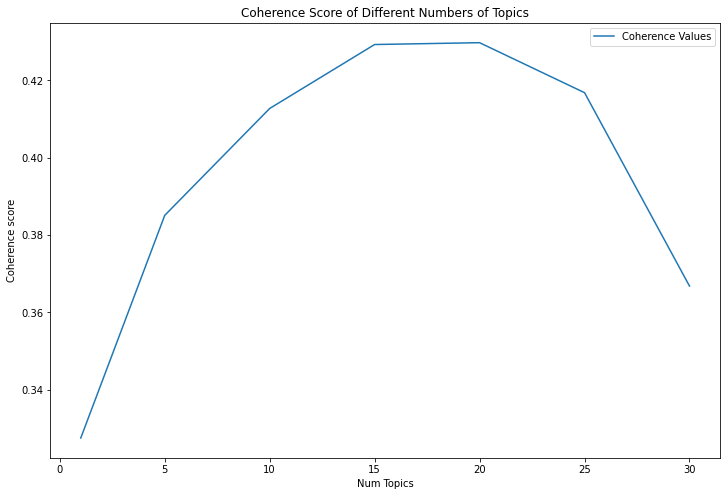

In [92]:
x=[1,5,10,15,20,25,30]
coherence_values=[ 0.3275670297976407,0.38508446420982845,0.41270130486423995,0.4292233839202749,0.42969646291854807,0.41678288615430814,0.36682846289825505]

plt.figure(figsize=(12,8))
plt.plot(x, coherence_values, label="Coherence Values")
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend()
plt.title("Coherence Score of Different Numbers of Topics")
plt.show()

##Determine paramters alpha and beta

In [93]:
# number of topics
num_topics =20
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics, random_state=100, alpha=0.01,eta=0.91)
# Print the Keyword in the 15 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin in

[(0,
  '0.007*"flashbots" + 0.003*"mev" + 0.003*"mist" + 0.002*"gt" + 0.002*"defi" '
  '+ 0.002*"new" + 0.001*"weeks" + 0.001*"middleware" + 0.001*"care" + '
  '0.001*"pools"'),
 (1,
  '0.008*"flashbots" + 0.002*"mev" + 0.002*"community" + 0.002*"future" + '
  '0.002*"nethermindeth" + 0.002*"ethglobal" + 0.002*"mist" + '
  '0.002*"lidofinance" + 0.001*"eth" + 0.001*"every"'),
 (2,
  '0.004*"flashbots" + 0.001*"trade" + 0.001*"week" + 0.001*"going" + '
  '0.001*"ournetwork__" + 0.001*"get" + 0.001*"poap" + 0.001*"bertcmiller" + '
  '0.001*"mev" + 0.001*"mist"'),
 (3,
  '0.003*"flashbots" + 0.002*"mev" + 0.001*"team" + 0.001*"article" + '
  '0.001*"ideation" + 0.001*"koihx" + 0.001*"believe" + 0.001*"called" + '
  '0.001*"zwaorp" + 0.001*"shared"'),
 (4,
  '0.009*"flashbots" + 0.002*"bundles" + 0.002*"mev" + 0.002*"report" + '
  '0.002*"work" + 0.002*"front" + 0.001*"ethereum" + 0.001*"transparency" + '
  '0.001*"thanks" + 0.001*"mist"'),
 (5,
  '0.005*"flashbots" + 0.004*"mev" + 0.002*"

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin in

In [94]:
# Compute Coherence Score

coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.3989427144721192


In [95]:
pyLDAvis.enable_notebook()
lda_viz = gensimvis.prepare(lda_model, corpus,id2word)
lda_viz

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
15    -0.026198  0.004393       1        1  15.814726
9      0.007934  0.017719       2        1  10.162733
12     0.000057 -0.001071       3        1   6.978340
0     -0.000088 -0.002885       4        1   6.386992
14     0.001518 -0.000495       5        1   6.235291
1      0.002071 -0.002840       6        1   6.192060
8     -0.003021 -0.001046       7        1   5.841846
4      0.000180 -0.000567       8        1   5.718165
6      0.001258 -0.001166       9        1   5.697691
11     0.004238 -0.002095      10        1   5.316282
16     0.002211  0.001239      11        1   3.760471
13     0.000205 -0.000332      12        1   3.759370
5     -0.000565 -0.000700      13        1   3.396991
17     0.000705 -0.001468      14        1   3.375150
2      0.000555 -0.001707      15        1   2.972671
19     0.001756 -0.000622      16        1   2.570868
18     0.001141 -0.001270      17        1   2.206246
3      0.001876 -0.001416      18        1   2.076653
7      0.002199 -0.001945      19        1   0.868530
10     0.001967 -0.001726      20        1   0.668924, topic_info=          Term       Freq      Total Category  logprob  loglift
176         gt   2.000000   2.000000  Default  30.0000  30.0000
336   crucible   6.000000   6.000000  Default  29.0000  29.0000
119        eth   5.000000   5.000000  Default  28.0000  28.0000
256      mistx   7.000000   7.000000  Default  27.0000  27.0000
30         mev  12.000000  12.000000  Default  26.0000  26.0000
..         ...        ...        ...      ...      ...      ...
147       team   0.026368   2.993863  Topic20  -6.9241   0.2751
944       week   0.026368   3.204338  Topic20  -6.9241   0.2072
261     crypto   0.026368   3.301326  Topic20  -6.9241   0.1773
1    flashbots   0.044530  33.855915  Topic20  -6.4001  -1.6265
30         mev   0.026368  12.116765  Topic20  -6.9241  -1.1229

[928 rows x 6 columns], token_table=      Topic      Freq            Term
term                                 
440       1  0.458565           added
486       2  0.477642        adoption
251       1  0.450770       alchemist
1026      1  0.372929   alchemistcoin
506       1  0.405219  alchemistradio
...     ...       ...             ...
38        1  0.407022             via
77        3  0.386916           video
688       2  0.385397             way
944       2  0.312077            week
1245      1  0.375011             yes

[125 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[16, 10, 13, 1, 15, 2, 9, 5, 7, 12, 17, 14, 6, 18, 3, 20, 19, 4, 8, 11])

In [96]:
# number of topics
num_topics =20
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics, random_state=100, alpha=0.3,eta=0.91)
# Print the Keyword in the 15 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin in

[(0,
  '0.008*"flashbots" + 0.004*"mev" + 0.003*"mist" + 0.002*"gt" + 0.002*"first" '
  '+ 0.002*"defi" + 0.002*"amm" + 0.002*"poap" + 0.002*"link" + 0.001*"miner"'),
 (1,
  '0.006*"flashbots" + 0.003*"mev" + 0.002*"community" + 0.002*"mist" + '
  '0.002*"nethermindeth" + 0.002*"ethglobal" + 0.001*"protecc" + '
  '0.001*"crucible" + 0.001*"ethergals" + 0.001*"lidofinance"'),
 (2,
  '0.003*"flashbots" + 0.002*"mist" + 0.001*"going" + 0.001*"poap" + '
  '0.001*"get" + 0.001*"nft" + 0.001*"collaboration" + 0.001*"mev" + '
  '0.001*"gas" + 0.001*"mistx"'),
 (3,
  '0.003*"flashbots" + 0.002*"mev" + 0.001*"team" + 0.001*"article" + '
  '0.001*"ecosystem" + 0.001*"week" + 0.001*"today" + 0.001*"good" + '
  '0.001*"overall" + 0.001*"explain"'),
 (4,
  '0.006*"flashbots" + 0.002*"mev" + 0.002*"work" + 0.002*"bundles" + '
  '0.002*"ethereum" + 0.001*"new" + 0.001*"report" + 0.001*"front" + '
  '0.001*"care" + 0.001*"pools"'),
 (5,
  '0.006*"flashbots" + 0.003*"mev" + 0.003*"eth" + 0.002*"miners"

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin in

In [97]:
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.4337302677133299


In [98]:
from pprint import pprint

# number of topics
num_topics =20
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics, random_state=100, alpha="symmetric",eta=0.91)
# Print the Keyword in the 15 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin in

[(0,
  '0.007*"flashbots" + 0.003*"mev" + 0.003*"mist" + 0.002*"first" + 0.002*"gt" '
  '+ 0.002*"defi" + 0.002*"new" + 0.001*"pools" + 0.001*"last" + 0.001*"amm"'),
 (1,
  '0.008*"flashbots" + 0.002*"mev" + 0.002*"community" + 0.002*"nethermindeth" '
  '+ 0.002*"ethglobal" + 0.002*"mist" + 0.002*"future" + 0.001*"lidofinance" + '
  '0.001*"eth" + 0.001*"transparency"'),
 (2,
  '0.004*"flashbots" + 0.001*"get" + 0.001*"trade" + 0.001*"poap" + '
  '0.001*"going" + 0.001*"ournetwork__" + 0.001*"mev" + 0.001*"week" + '
  '0.001*"bertcmiller" + 0.001*"mist"'),
 (3,
  '0.004*"flashbots" + 0.002*"mev" + 0.002*"team" + 0.001*"article" + '
  '0.001*"overall" + 0.001*"txzkgbphz" + 0.001*"rebased" + 0.001*"epoch" + '
  '0.001*"dvi" + 0.001*"ideation"'),
 (4,
  '0.008*"flashbots" + 0.002*"bundles" + 0.002*"report" + 0.002*"mev" + '
  '0.002*"work" + 0.002*"ethereum" + 0.001*"front" + 0.001*"transparency" + '
  '0.001*"mistx" + 0.001*"mist"'),
 (5,
  '0.004*"flashbots" + 0.003*"mev" + 0.002*"eth" 

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin in

In [99]:
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.42375854606878416


##Network

The words in cleaned tweets are paired up by their co-occurrence across the tweets. A counter is defined to capture the top 50 co-occurrence frequency. We choose Python package NetworkX for visualizing this weighted graph. Each node represents a word, each edge represents a connection between words co-occurrence,  and the thickness of edges depicts is absolute frequency of the occurrence of word-word pair. 


In [55]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections

import tweepy as tw
import nltk
from nltk import bigrams
from nltk.corpus import stopwords
import re
import networkx as nx
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

import warnings
warnings.filterwarnings("ignore")

nltk.download('wordnet')
sns.set(font_scale=1.5)
sns.set_style("whitegrid")

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [56]:
def remove_url(txt):
    """Replace URLs found in a text string with nothing 
    (i.e. it will remove the URL from the string).

    Parameters
    ----------
    txt : string
        A text string that you want to parse and remove urls.

    Returns
    -------
    The same txt string with url's removed.
    """
    
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    no_url = url_pattern.sub(r'', txt)

    return no_url

In [57]:
def stem_tokens(tokens):
    stemmer = nltk.stem.PorterStemmer()
    tokens = [stemmer.stem(token) for token in tokens]
    return tokens
def lemmatize_tokens(tokens):
    lemmatizer = nltk.stem.WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return tokens

In [108]:
df_mev2

Date  \
0   2021-12-31 05:49:28+00:00   
1   2021-12-28 17:14:22+00:00   
2   2021-12-27 11:00:25+00:00   
3   2021-12-27 10:00:34+00:00   
4   2021-12-27 02:32:05+00:00   
..                        ...   
426 2021-03-23 21:43:11+00:00   
427 2021-03-23 01:49:32+00:00   
428 2021-03-17 19:40:17+00:00   
429 2021-03-17 15:37:19+00:00   
430 2021-03-16 22:39:10+00:00   

                                                Tweets  \
0    This is what a sandwich attack looks like. The...   
1    ¿Sabías que en el mundo de las #DeFi existen e...   
2    [#IOTAQuicktakes] Let’s wrap up this year with...   
3    [#IOTAQuicktakes] Let’s wrap up this year with...   
4    What is Miner extractable value (#MEV) and how...   
..                                                 ...   
426  #MEV has a reputational problem, and is usuall...   
427  $OHM just got listed on Sushiswap, a bot "brib...   
428  Today's livestream I covered a range of topics...   
429  📢 New Mevion Blog Post! 📝 \n\nCheck out our br...   
430  🏹 ARB THAT ARCH! 🏹\n\nOcarinaBot completed the...   

                                  paper_text_processed  len         day  \
0    this is what a sandwich attack looks like they...   51  2021-12-31   
1    ¿sabías que en el mundo de las #defi existen e...   38  2021-12-28   
2    [#iotaquicktakes] let’s wrap up this year with...   47  2021-12-27   
3    [#iotaquicktakes] let’s wrap up this year with...   47  2021-12-27   
4    what is miner extractable value (#mev) and how...   32  2021-12-27   
..                                                 ...  ...         ...   
426  #mev has a reputational problem and is usually...   31  2021-03-23   
427  $ohm just got listed on sushiswap a bot "bribe...   29  2021-03-23   
428  today's livestream i covered a range of topics...   39  2021-03-17   
429  📢 new mevion blog post 📝 \n\ncheck out our bra...   30  2021-03-17   
430  🏹 arb that arch 🏹\n\nocarinabot completed the ...   34  2021-03-16   

                               tweet_without_stopwords  
0    sandwich attack look like they're common low c...  
1    ¿sabías que en el mundo la #defi existen estra...  
2    [#iotaquicktakes] let’s wrap year recap latest...  
3    [#iotaquicktakes] let’s wrap year recap latest...  
4    miner extractable value (#mev) people (or flas...  
..                                                 ...  
426  #mev reputational problem usually attached neg...  
427  $ohm got listed sushiswap bot "bribed" miner w...  
428  today's livestream covered range topic include...  
429  📢 new mevion blog post 📝 check brand new blog ...  
430  🏹 arb arch 🏹 ocarinabot completed first #mev a...  

[431 rows x 6 columns]

In [62]:
tweets_no_urls = [remove_url(tweet) for tweet in df_mev2.paper_text_processed]
# Create list of lists containing bigrams in tweets
words_in_tweet = [tweet.lower().split() for tweet in tweets_no_urls]

# Download stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Remove stop words from each tweet list of words
tweets_nsw = [[word for word in tweet_words if not word in stop_words]
              for tweet_words in words_in_tweet]

# Remove collection words
collection_words = ["marquem","m脕ximo","abaixo","colem","u","e","#mev聽","poss脥veis",'馃槩',"&amp;","脕","脥","鈥檛","鈥檙", "鈥檚",'from', 'subject', 're', 'edu', 'use','https', "tco","-","de","amp","la","et","les","en","lo","un","el","que","por","es","se","los","para","ser","las","mas","una"]
lemmatizer=WordNetLemmatizer()
tweets_nsw_nc = [[lemmatizer.lemmatize(w) for w in word if not w in collection_words]
                 for word in tweets_nsw]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [59]:
# Create list of lists containing bigrams in tweets
terms_bigram = [list(nltk.bigrams(tweet)) for tweet in tweets_nsw_nc]
bigrams = list(itertools.chain(*terms_bigram))
# Create counter of words in clean bigrams
bigram_counts = collections.Counter(bigrams)
bigram_df_mev = pd.DataFrame(bigram_counts.most_common(50),
                             columns=['bigram', 'count'])

bigram_df_mev

bigram  count
0               (extractable, value)     21
1                 (#mev, #flashbots)     16
2               (miner, extractable)     13
3                   (front, running)     13
4                             (💜, 💜)     10
5                      (#defi, #mev)     10
6                  (smart, contract)      9
7                   (#mev, solution)      9
8                 (#flashbots, #mev)      9
9                      (stay, tuned)      8
10                 (#mev, #ethereum)      8
11                       (#mh, #mev)      7
12             (#mev, #mehwishhayat)      7
13             (extractable, value))      7
14                     (#mev, #defi)      7
15                (sandwich, attack)      6
16                      (look, like)      6
17                  (solution, #mev)      6
18                  (#crypto, #defi)      6
19                (💜, @mehwishhayat)      5
20                (@mehwishhayat, 💜)      5
21                          (💜, #mh)      5
22                (#mehwishhayat, 💜)      5
23              (💜, #mehwishhsource)      5
24                      (#mev, $eth)      5
25             (#frontrunning, #mev)      5
26                   (#mev, #crypto)      5
27                (fair, sequencing)      5
28             (sequencing, service)      5
29                     (#mev, front)      5
30               ($7600, phenomenal)      5
31                 (phenomenal, top)      5
32                      (top, level)      5
33              (level, #domainname)      5
34               (#domainname, sale)      5
35                      (sale, #mev)      5
36          (#mev, #machinelearning)      5
37  (#machinelearning, #datascience)      5
38           (#datascience, #python)      5
39                    (#python, #ai)      5
40             (#ai, #100daysofcode)      5
41     (#100daysofcode, #innovation)      5
42               (#innovation, #iot)      5
43                  (#iot, #flutter)      5
44           (#flutter, #javascript)      5
45        (#javascript, #serverless)      5
46     (#serverless, #cybersecurity)      5
47           (#cybersecurity, #tech)      5
48                    (#tech, #ddos)      5
49            (#ddos, #deeplearning)      5

In [113]:
bigram_df_mev.to_csv("mev_network.csv")

In [60]:
# Create dictionary of bigrams and their counts
d = bigram_df_mev.set_index('bigram').T.to_dict('records')
# Create network plot 
G = nx.Graph()
# Create connections between nodes
for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=v/1000)
G.remove_nodes_from(["pfv", "tag"])

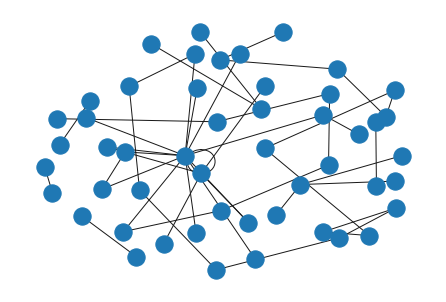

In [68]:
nx.draw(G)

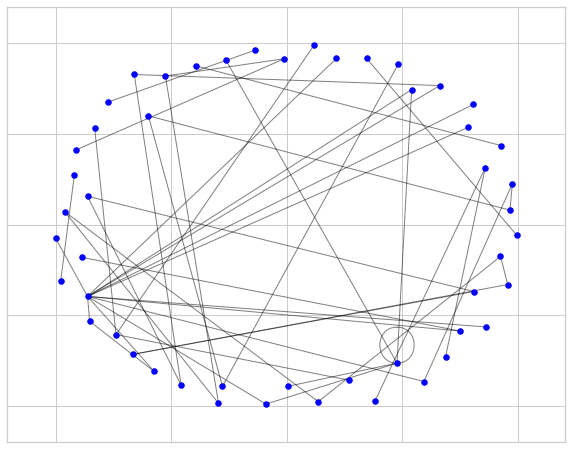

In [79]:
plt.figure(figsize=(10,8))
pos = nx.spring_layout(G, k=10)
node_options = {"node_color": "blue", "node_size": 30}
edge_options = {"width": 1, "alpha": .5, "edge_color": "black"}
nx.draw_networkx_nodes(G, pos, **node_options)
nx.draw_networkx_edges(G, pos, **edge_options)
plt.show()

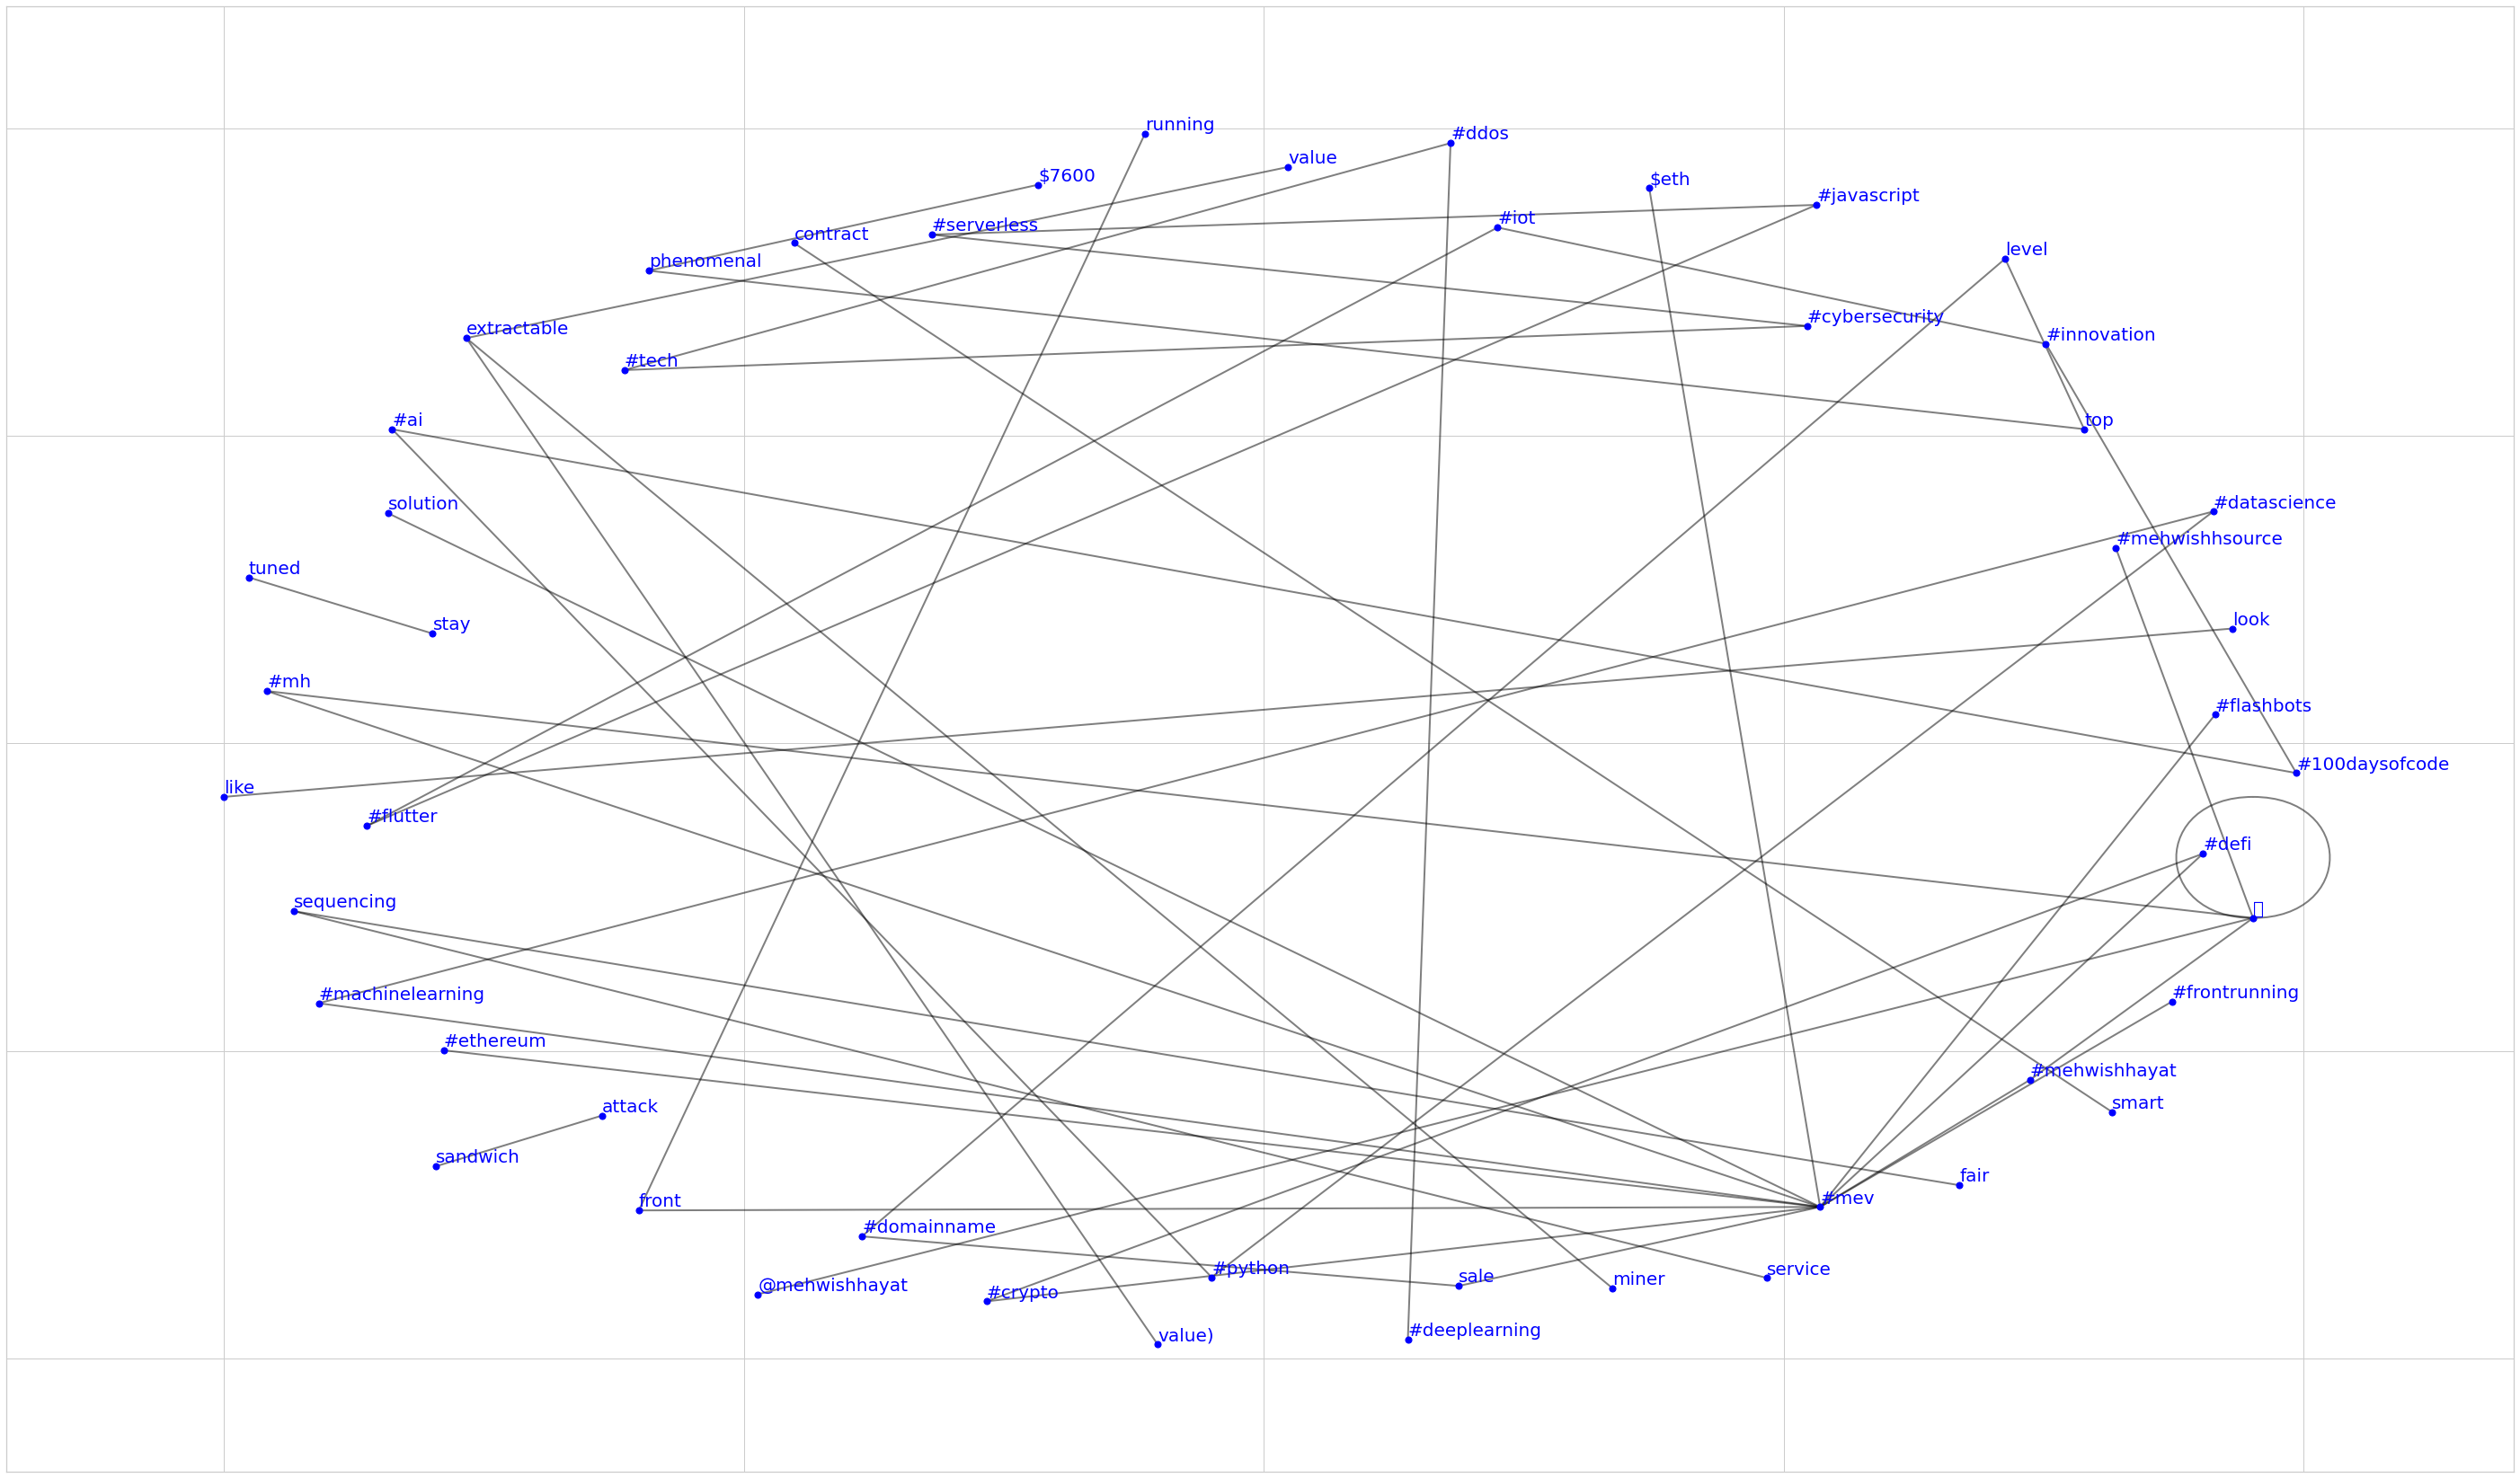

In [89]:
plt.figure(figsize=(50,30))
pos = nx.spring_layout(G, k=10)
node_options = {"node_color": "blue", "node_size": 50}
edge_options = {"width": 2, "alpha": .5, "edge_color": "black"}
nx.draw_networkx_nodes(G, pos, **node_options)
nx.draw_networkx_edges(G, pos, **edge_options)
node_label_options = {"font_size":20,
                      "font_color": "blue",
                      "verticalalignment":"bottom",
                      "horizontalalignment":"left"}
nx.draw_networkx_labels(G,pos,**node_label_options)

plt.show()